# Aggregated Daily Sentiment

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from main import get_data

(root, data_path, presidents, cities, countries, years, colors) = get_data()
timeframe = ('2018-08-01', '2022-07-31')

In [44]:
def add_day_and_get_daily_sentiment(data):
    # Group the data by day and calculate the average 'Compound' value
    # convert to datetime
    data['created_at'] = pd.to_datetime(data['created_at'])
    data['day'] = data['created_at'].dt.date
    daily_sentiment = data.groupby('day')['Compound'].mean().reset_index()
    return data, daily_sentiment

In [4]:
def get_compound_mean(data):
    assert 'Compound' in data.columns
    return data['Compound'].mean()

In [29]:
# old version:
def plot_sentiment_with_highlights_and_timeframes(daily_sentiment, title, mean_location=None, significant_points=None, timeframe=None, colors=None, average_compound=None, save_path=None):
    plt.figure(figsize=(15, 8))
    sns.lineplot(x='day', y='Compound', data=daily_sentiment, color=colors[1])

    if significant_points:
        for point in significant_points:
            point_date = pd.to_datetime(point).date()
            if point_date in daily_sentiment['day'].values:
                plt.scatter(point_date, daily_sentiment.loc[daily_sentiment['day'] == point_date, 'Compound'], color=colors[0], s=100, edgecolor='black', zorder=5)

    if timeframe:
        plt.axvspan(pd.to_datetime(timeframe[0]).date(), pd.to_datetime(timeframe[1]).date(), color=colors[0], alpha=0.3)

    plt.axhline(0, color='gray', linestyle='--', linewidth=1)

    if average_compound:
        plt.axhline(average_compound, color='black', linestyle='--', linewidth=2, label=f'President Average Sentiment Score ({average_compound:.2f})')
        offset = (daily_sentiment['Compound'].max() - daily_sentiment['Compound'].min()) * 0.02
        plt.text(daily_sentiment['day'].max(), average_compound + offset, f' {average_compound:.2f}', verticalalignment='bottom', horizontalalignment='right', color='black', fontsize=10)

    # Plot the second horizontal line if the value is provided
    if mean_location is not None:
        plt.axhline(mean_location, color=colors[0], linestyle='--', linewidth=2, label=f'Mean {location} Sentiment Score ({mean_location:.2f})')
        # Adjust the label position for the second line
        offset = (daily_sentiment['Compound'].max() - daily_sentiment['Compound'].min()) * 0.03  # Slightly larger offset for clarity
        plt.text(daily_sentiment['day'].max(), mean_location - offset, f' {mean_location:.2f}', verticalalignment='top', horizontalalignment='right', color=colors[0], fontsize=10)

    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    sns.despine()
    plt.legend()
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, format='png', bbox_inches='tight')
    plt.show()


In [ ]:
# trump_significant_points = {
#     'Birmingham': ['2019-10', '2021-05'],
#     'London': ['2021-05']
# }
# johnson_significant_points = {
#     'Birmingham': ['2020-08', '2022-04', '2020-04', '2021-02'],
#     'NYC': ['2019-12']
# }
# significant_points = [pd.to_datetime(significant_points).date()]

In [ ]:
mean_compound = pd.read_pickle('results/mean_compound.pkl')

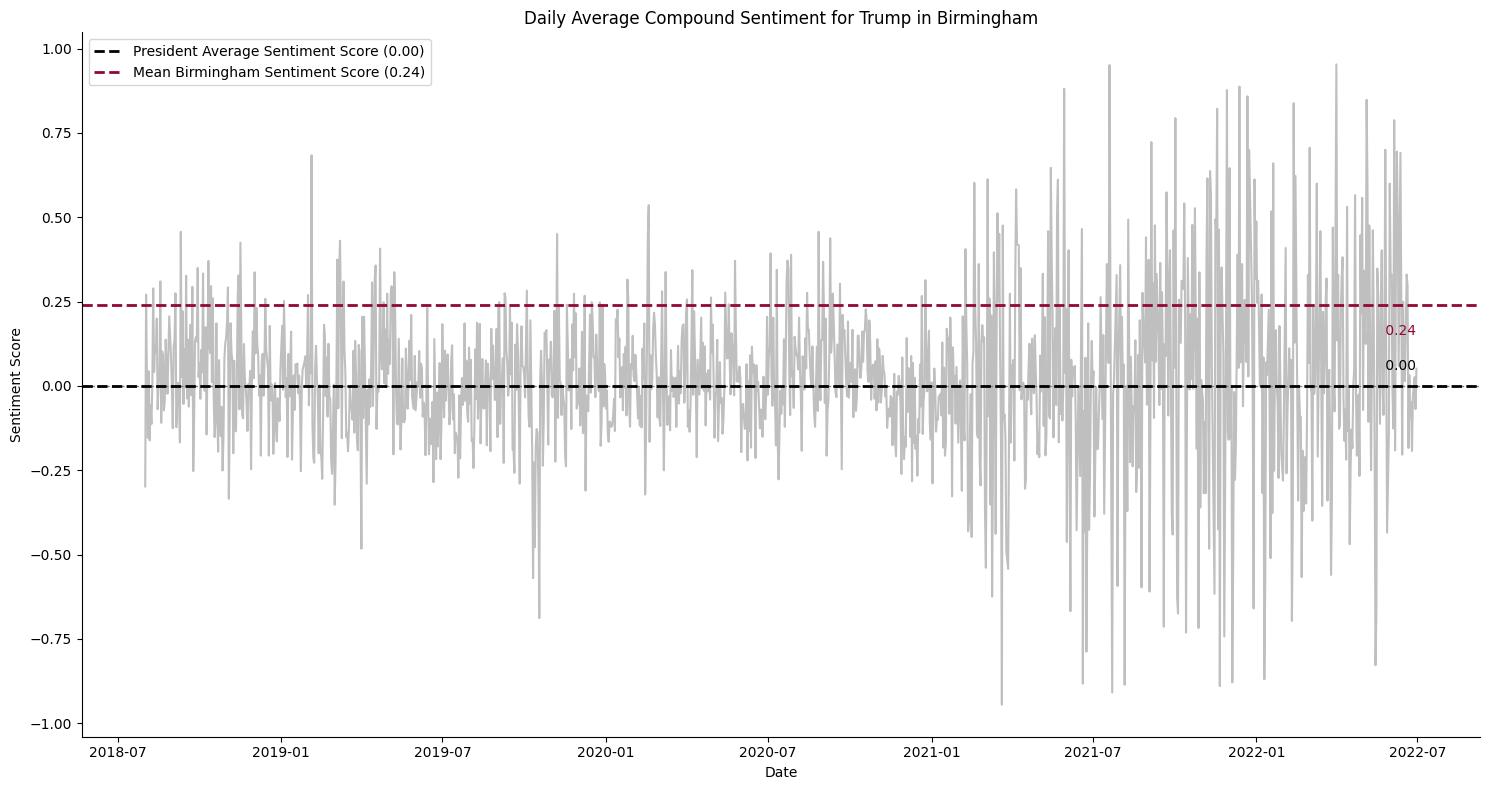

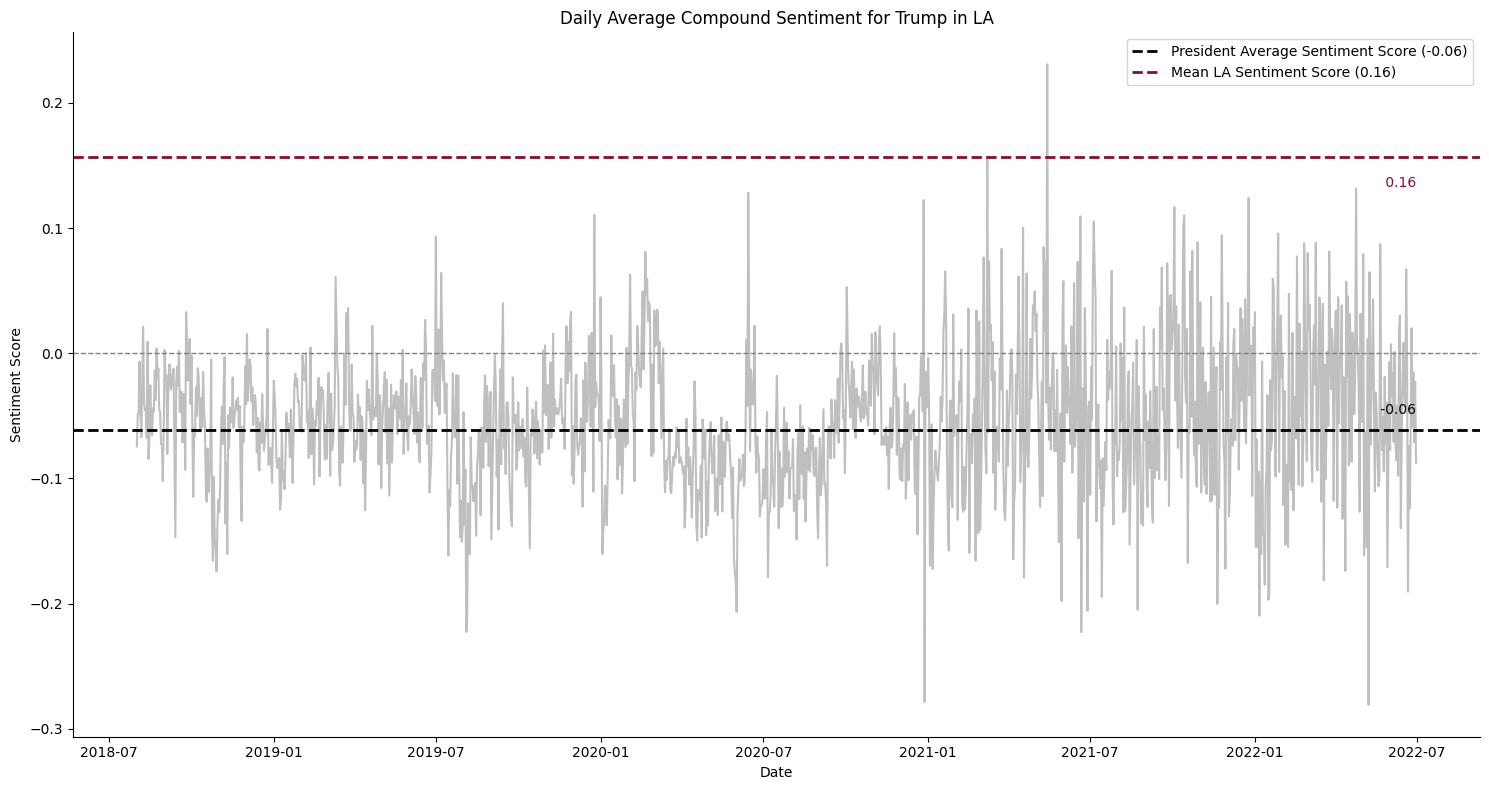

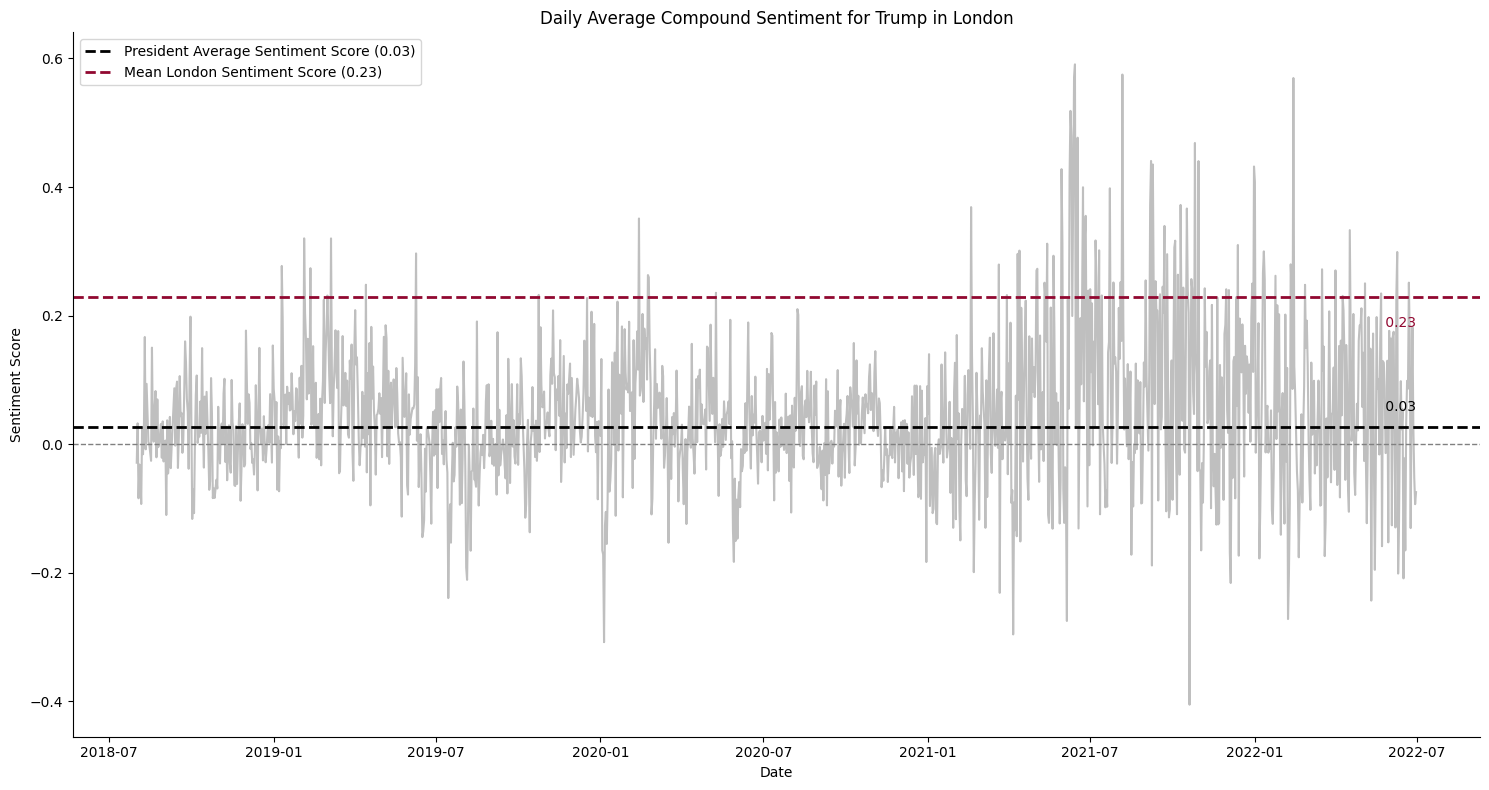

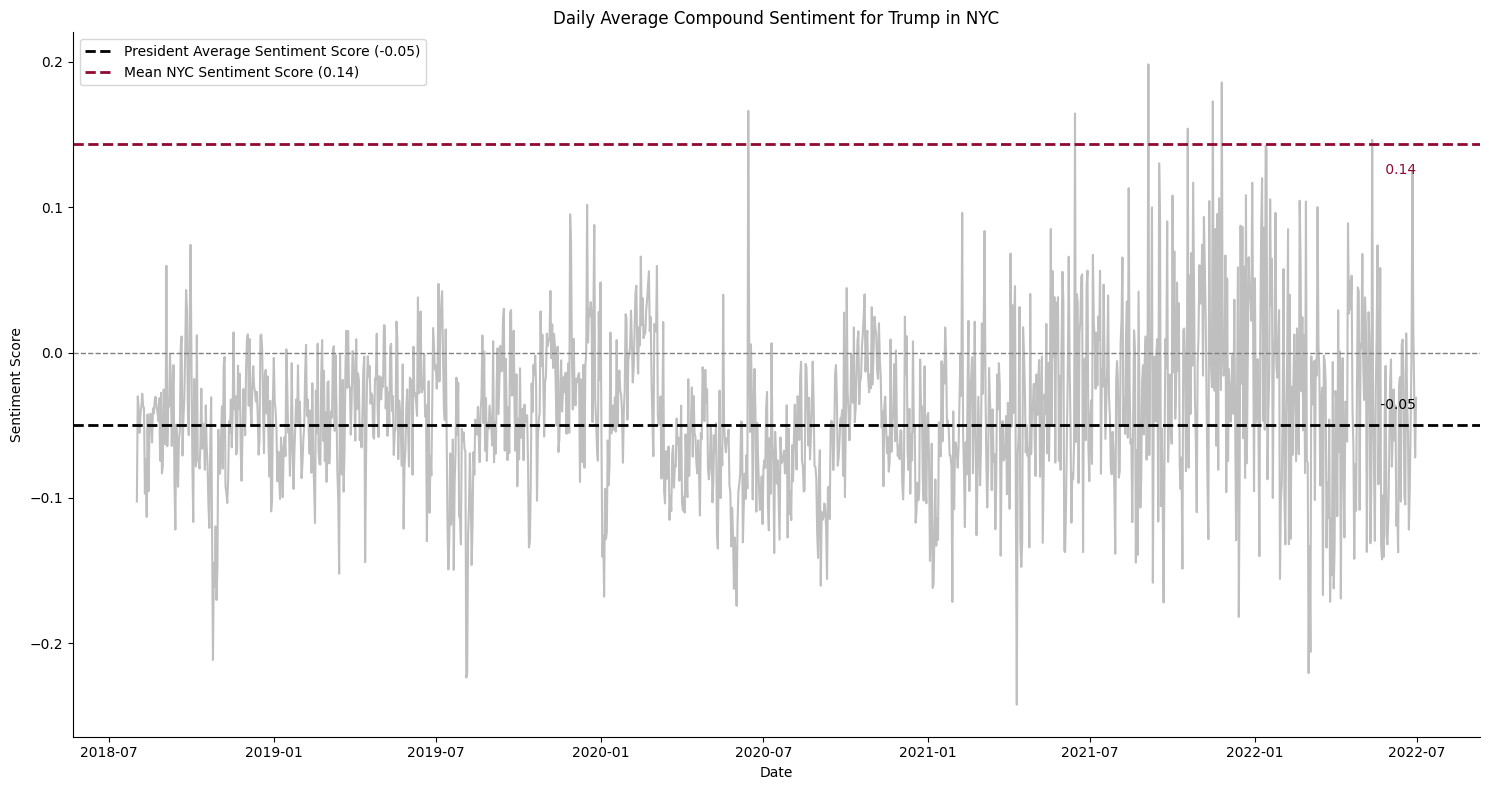

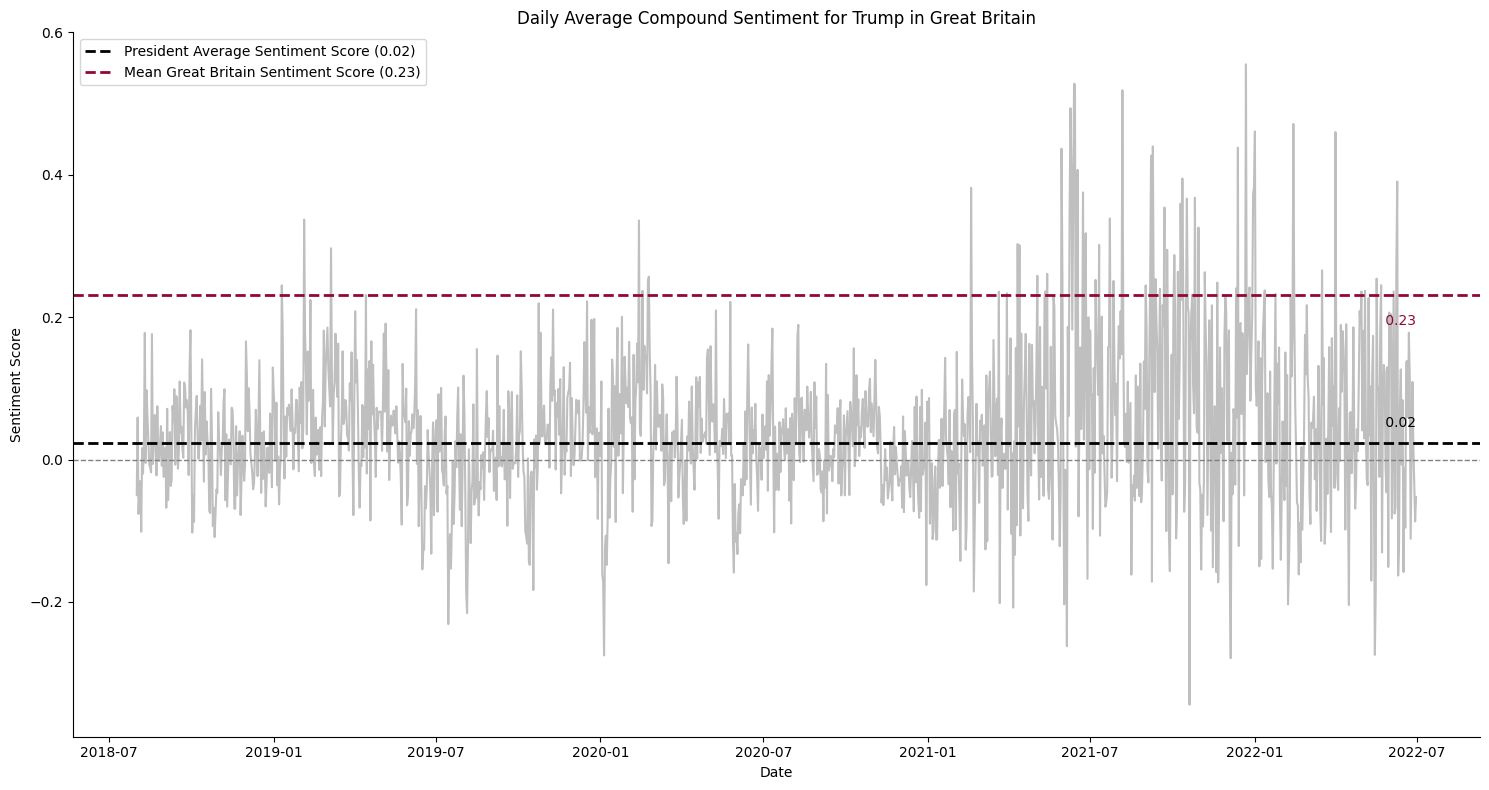

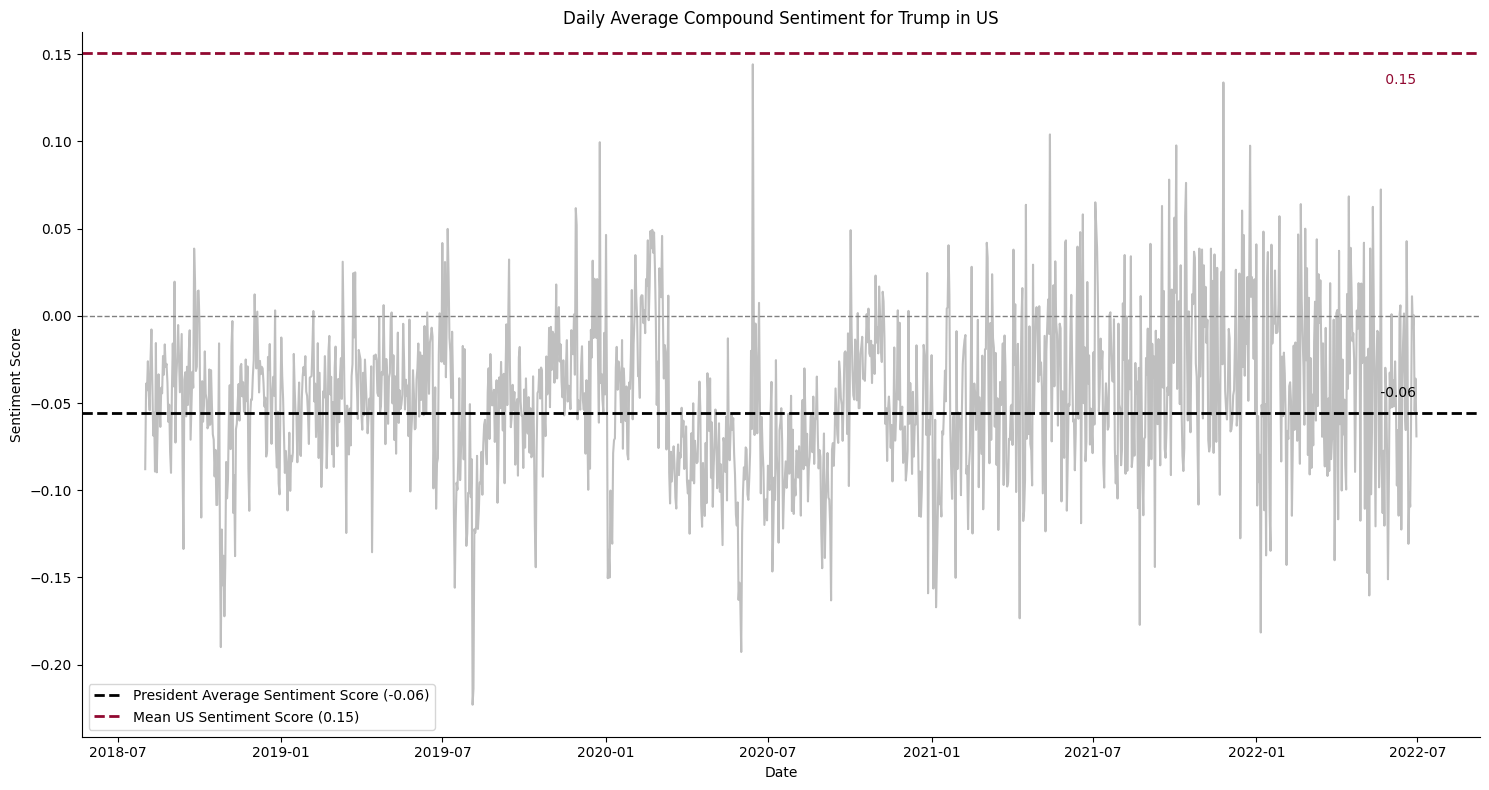

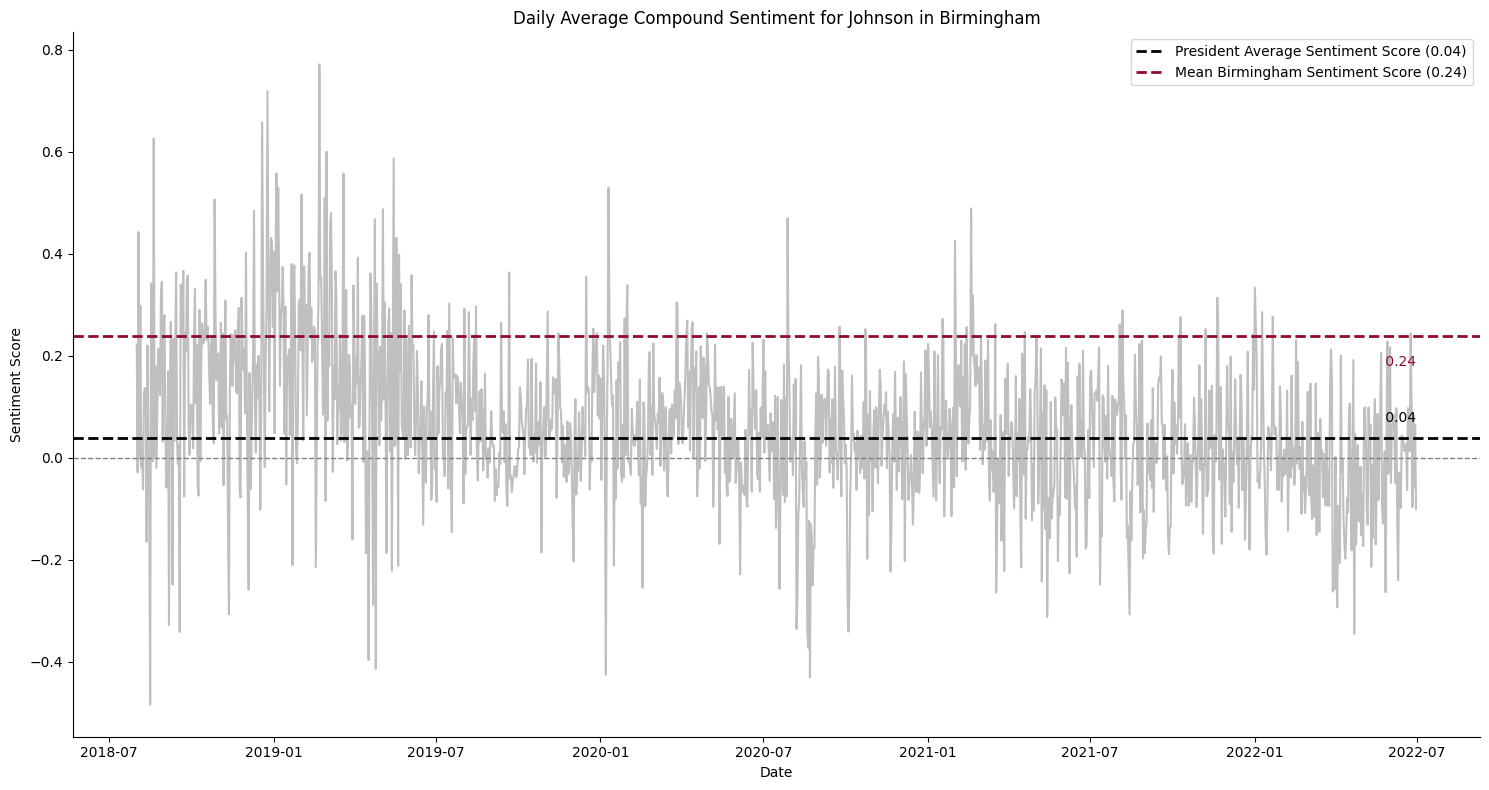

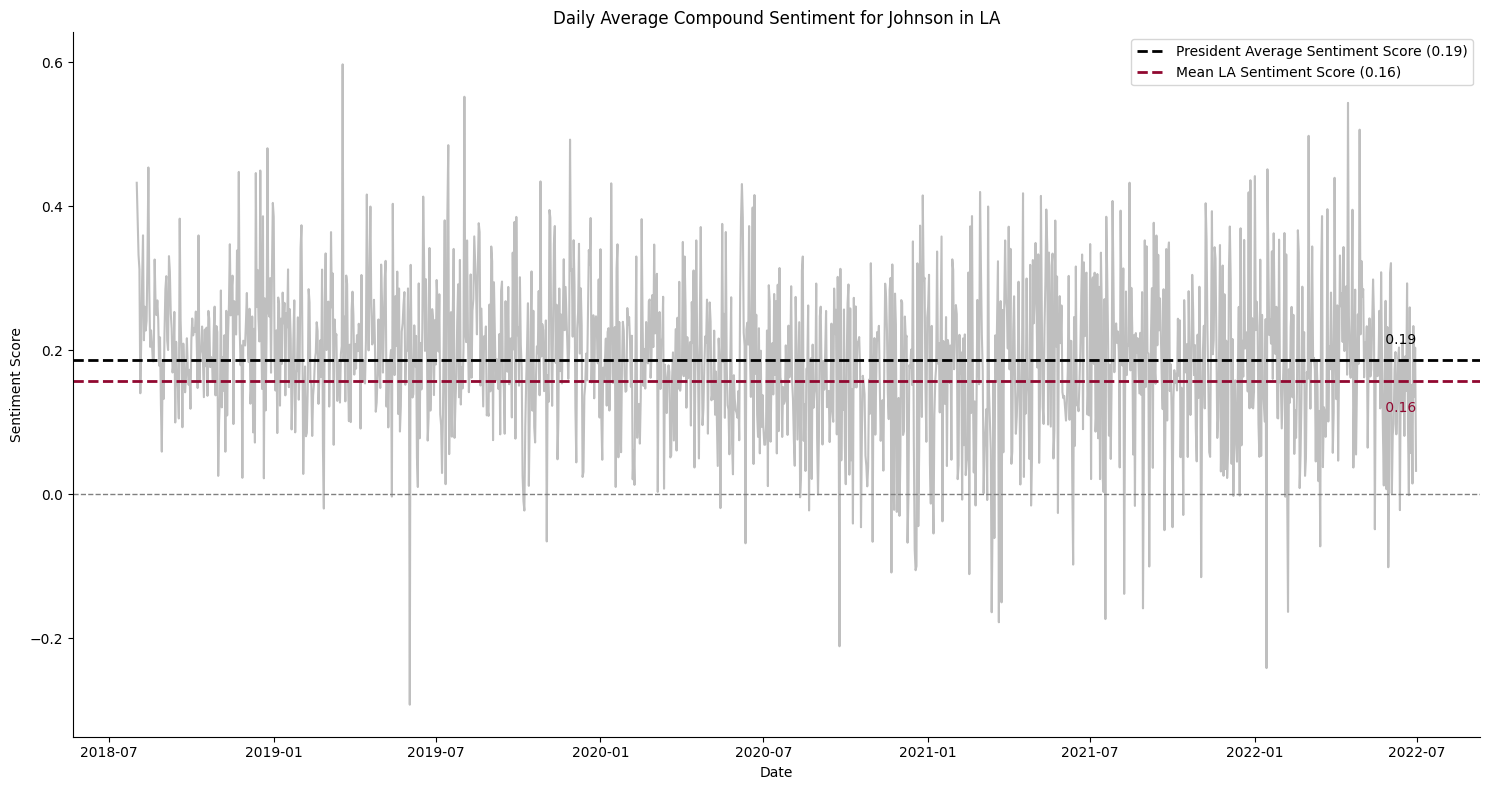

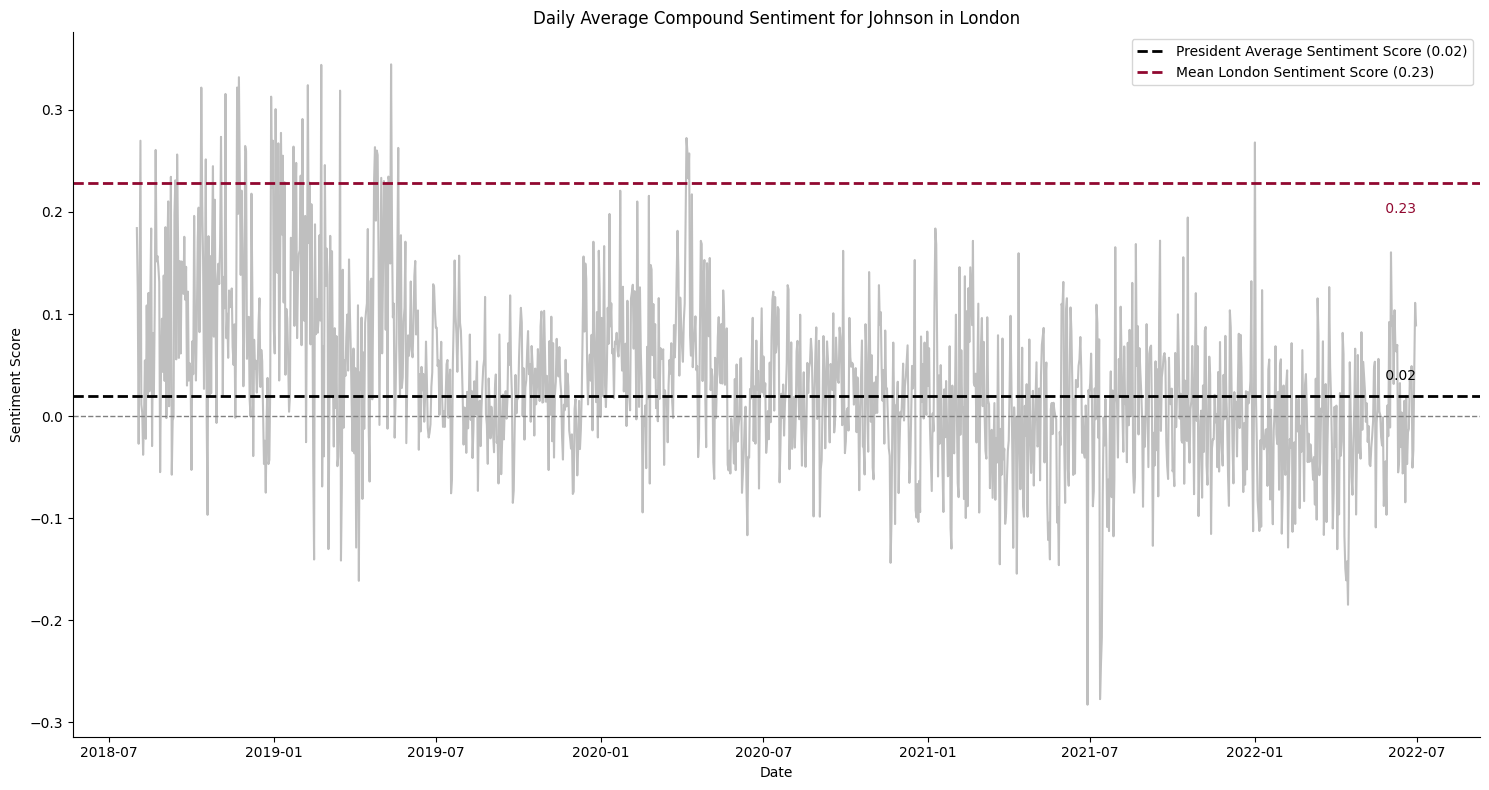

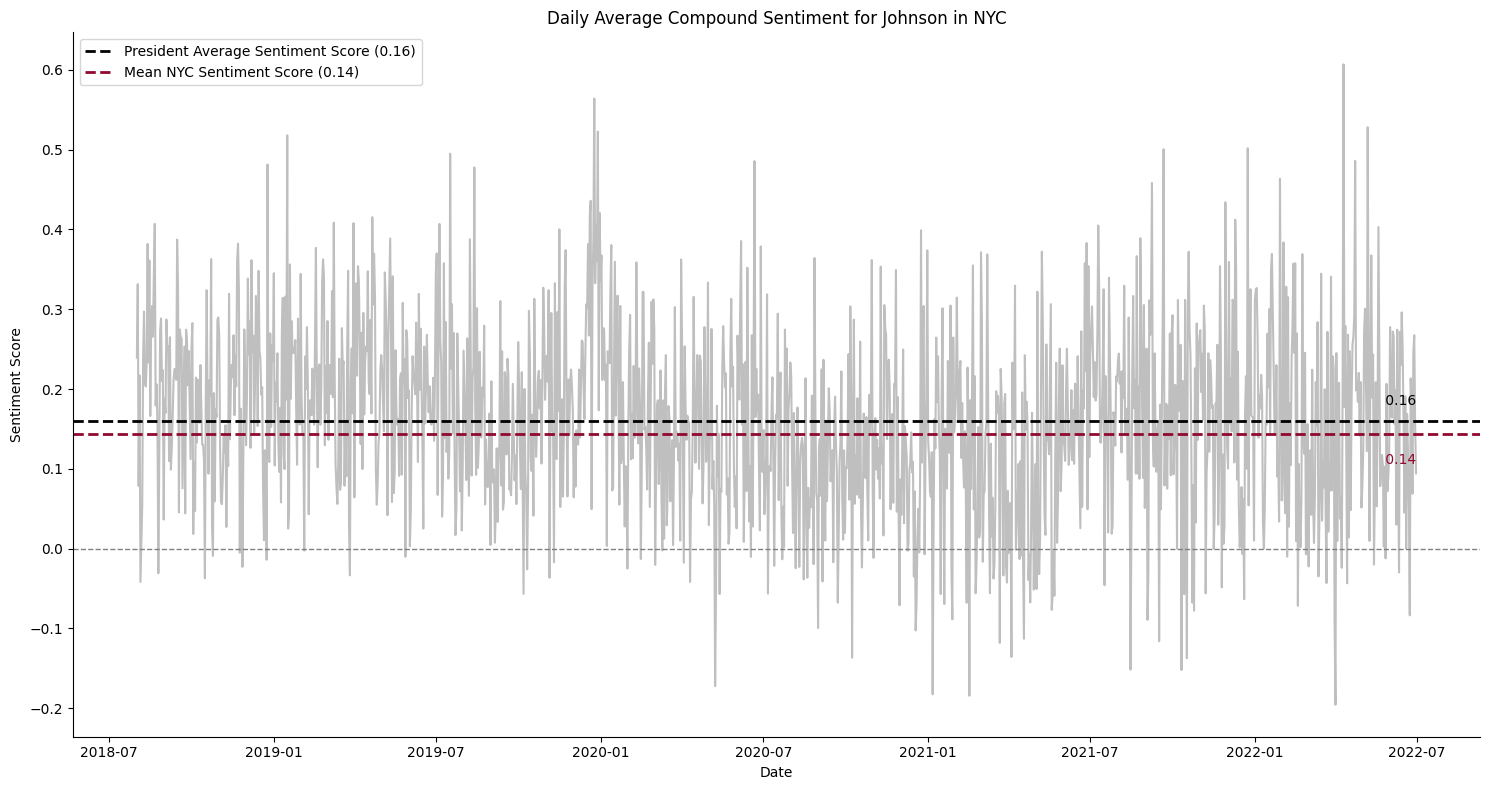

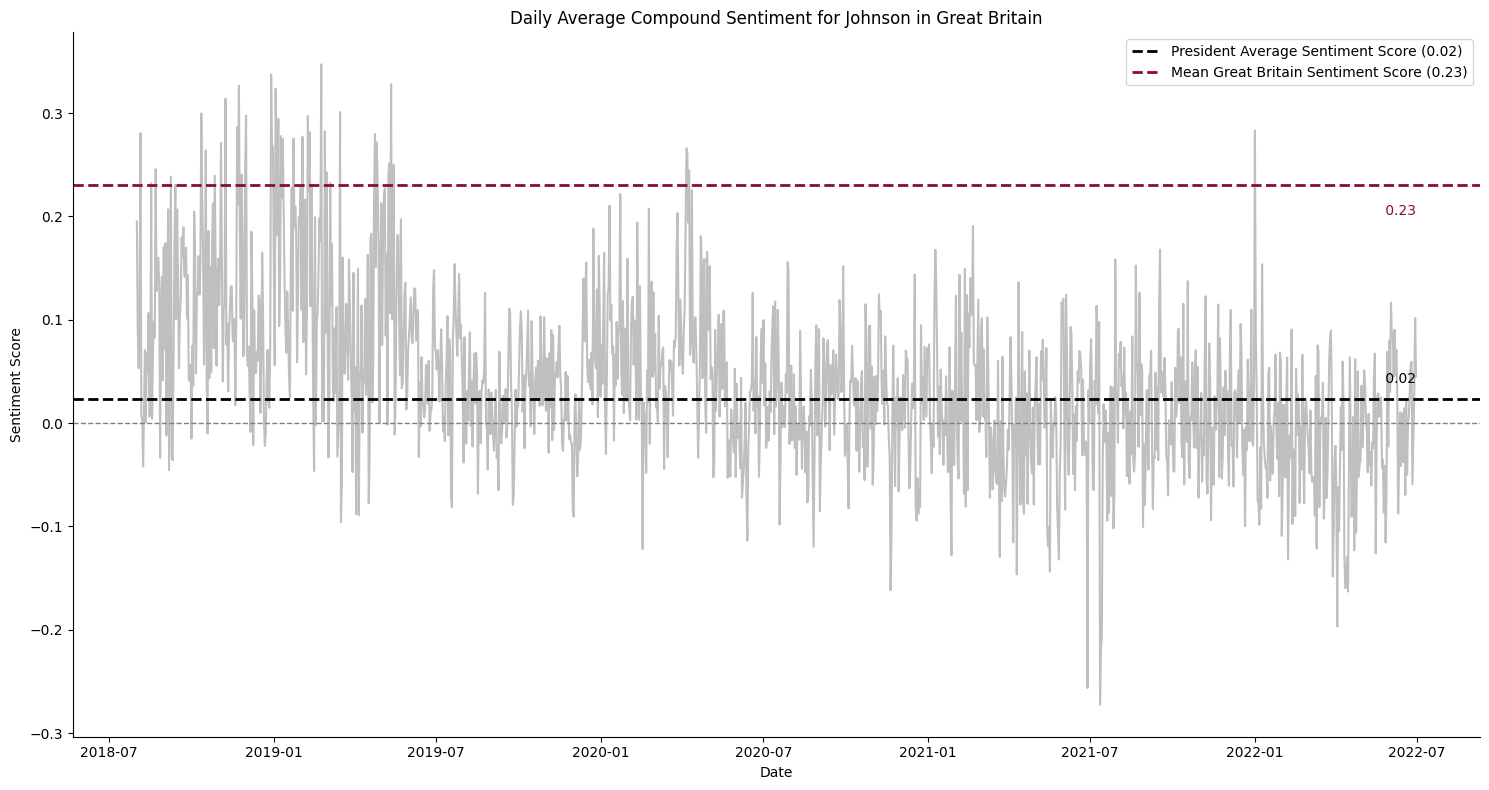

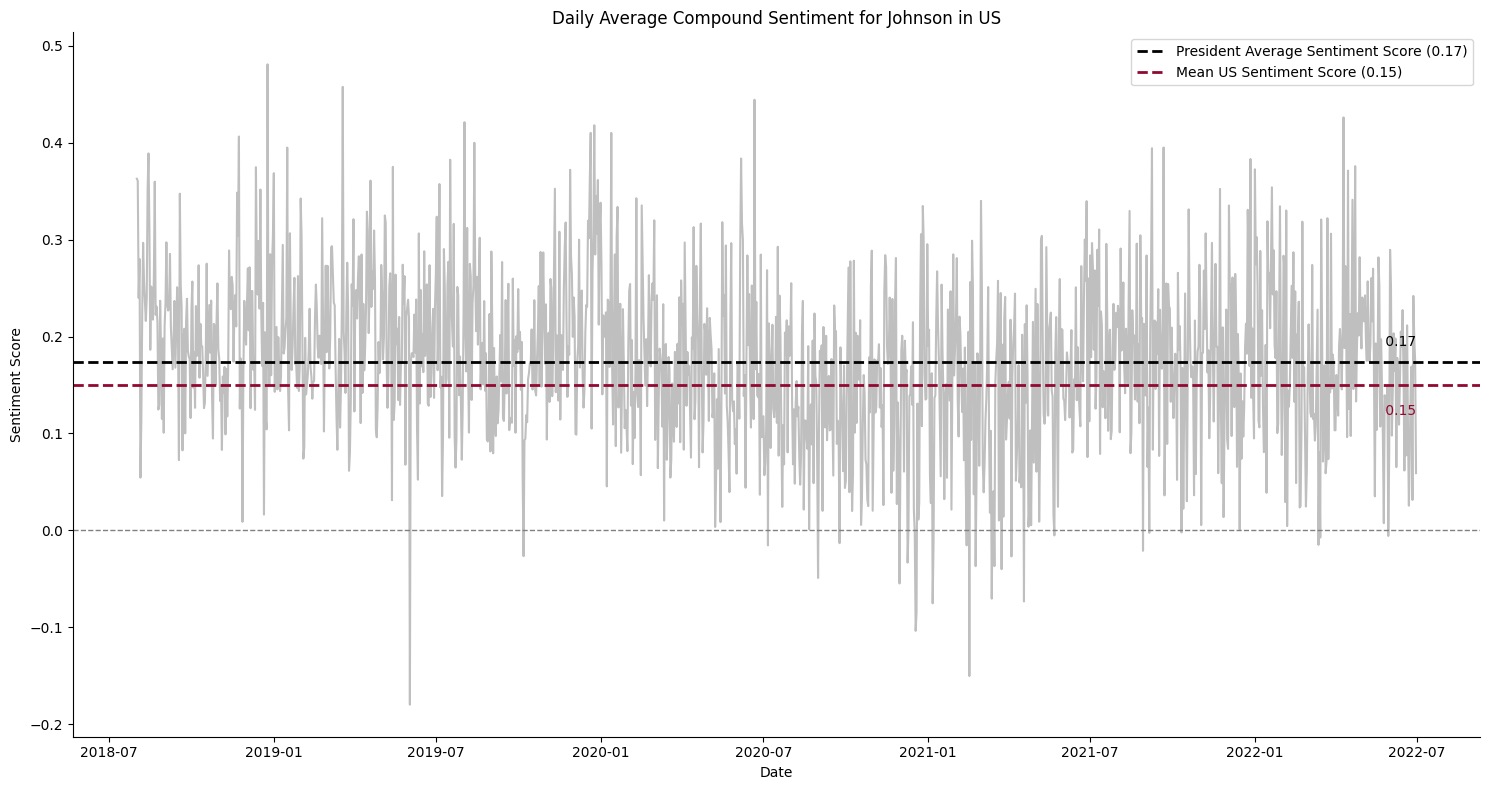

In [32]:
for president in presidents:
    for location in (cities + countries):
        title = f'Daily Average Compound Sentiment for {president.capitalize()} in {location}'
        filepath = f'{data_path}{president}-{location}.pkl'
        data = pd.read_pickle(filepath)
        data, daily_sentiment = add_day_and_get_daily_sentiment(data)
        average_compound = get_compound_mean(data)
        plot_sentiment_with_highlights_and_timeframes(daily_sentiment,
                                                title,
                                                colors=colors,
                                                average_compound=average_compound,
                                                mean_location=mean_compound.at['All',location],
                                                save_path=f'visualizations/compound_sentiment/{president}-{location}.png')

In [75]:
def plot_sentiment_with_highlights_and_timeframes(daily_sentiment, title, location, columns, averages, mean_location=None, significant_points=None, timeframe=None, colors=None, save_path=None):
    """
    Plot sentiment scores with highlights and timeframes.

    Parameters:
    daily_sentiment (DataFrame): Data containing sentiment scores.
    title (str): The title of the plot.
    columns (list): The columns from the DataFrame to plot.
    averages (list): Averages for each column to plot as horizontal lines.
    mean_location (float, optional): A location's mean sentiment to be plotted as a horizontal line.
    significant_points (list of str/datetime, optional): Points to be highlighted on the plot.
    timeframe (tuple of str/datetime, optional): A timeframe to highlight on the plot.
    colors (list): Colors for each column line and average line.
    save_path (str, optional): Path to save the figure.
    """
    plt.figure(figsize=(15, 8))
    
    # Ensure colors is a list with enough colors
    if not colors or len(colors) < len(columns):
        raise ValueError("Colors list is not provided or does not have enough colors.")
    
    # Plot lines for each sentiment column
    for i, column in enumerate(columns):
        sns.lineplot(x='day', y=column, data=daily_sentiment, color=colors[i], label=f'{column.capitalize()} Sentiment')
        if averages[i] is not None:
            plt.axhline(y=averages[i], color=colors[i], linestyle='--', linewidth=2, label=f'{column.capitalize()} Mean Sentiment({averages[i]:.2f})')

    # Highlight significant points
    if significant_points:
        for point in significant_points:
            plt.scatter(daily_sentiment['day'], daily_sentiment[point], color='red', s=50, zorder=5, label='Significant Point' if point == significant_points[0] else "")

    # Highlight the timeframe
    if timeframe:
        plt.axvspan(pd.to_datetime(timeframe[0]), pd.to_datetime(timeframe[1]), color='yellow', alpha=0.3, label='Significant Period')

    # Plot mean location horizontal line
    if mean_location is not None:
        plt.axhline(y=mean_location, color='green', linestyle='--', linewidth=2, label=f'Mean Sentiment in {location} ({mean_location:.2f})')

    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    sns.despine()
    plt.legend()
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, format='png', bbox_inches='tight')
    plt.show()


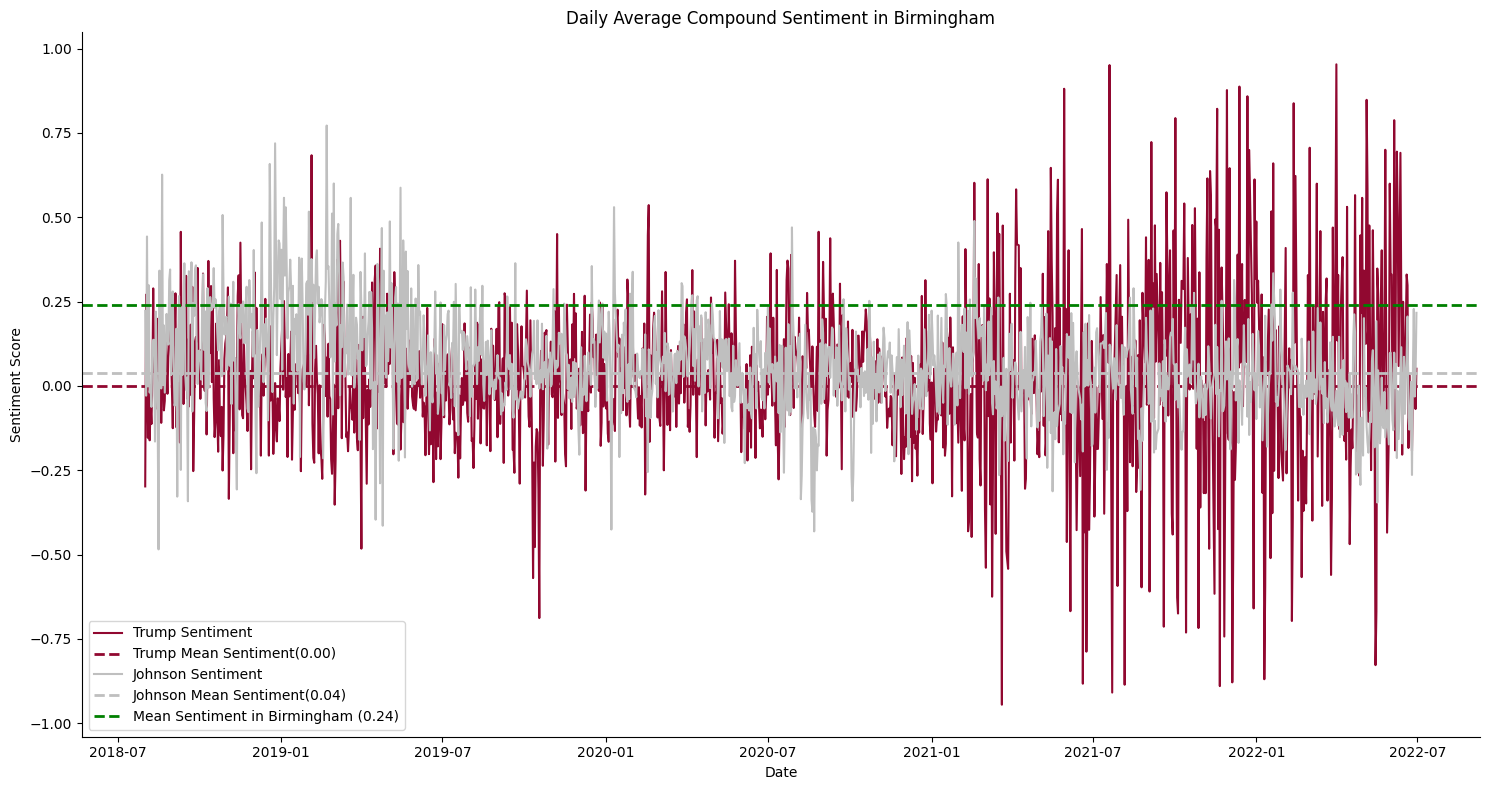

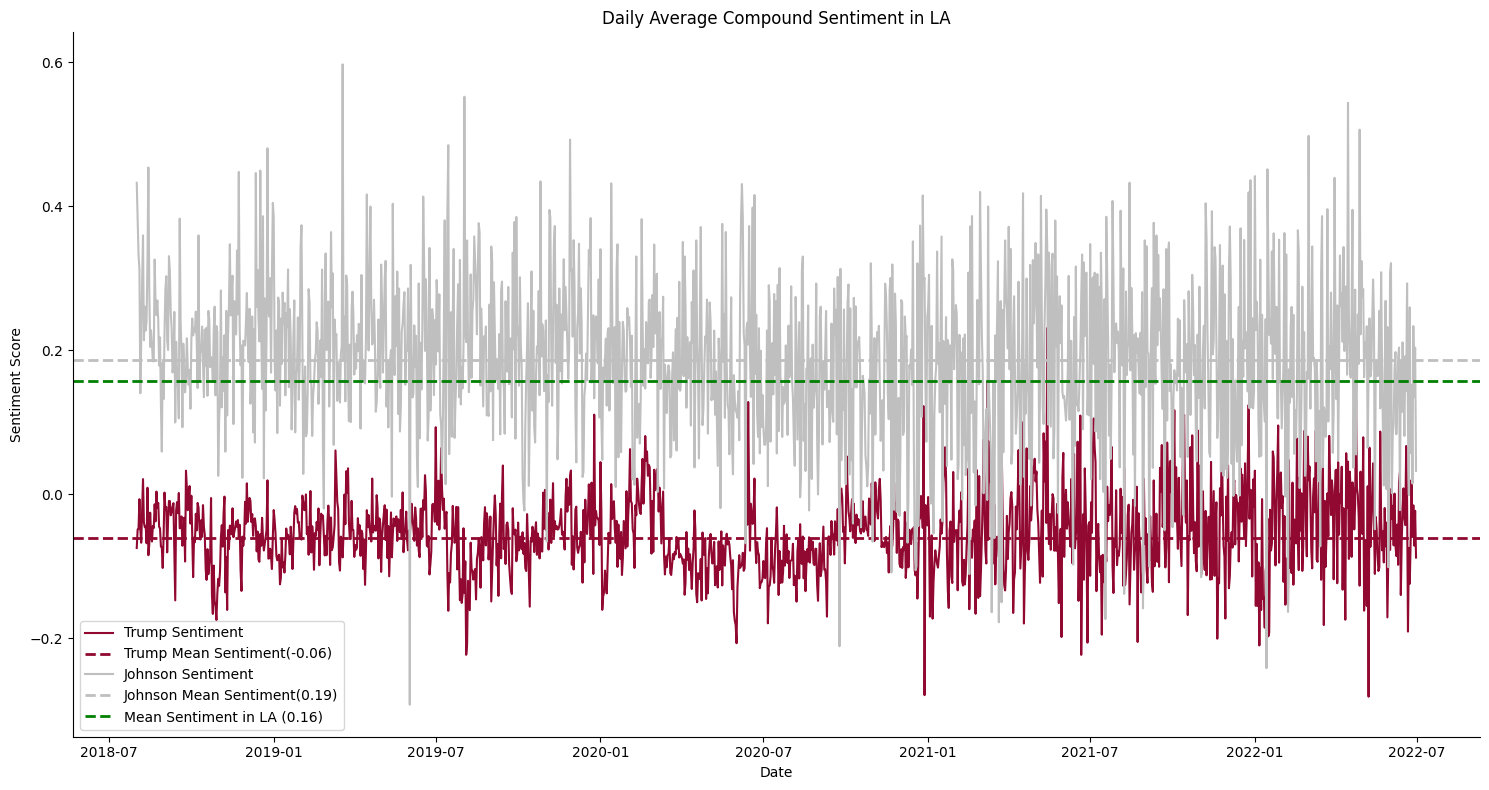

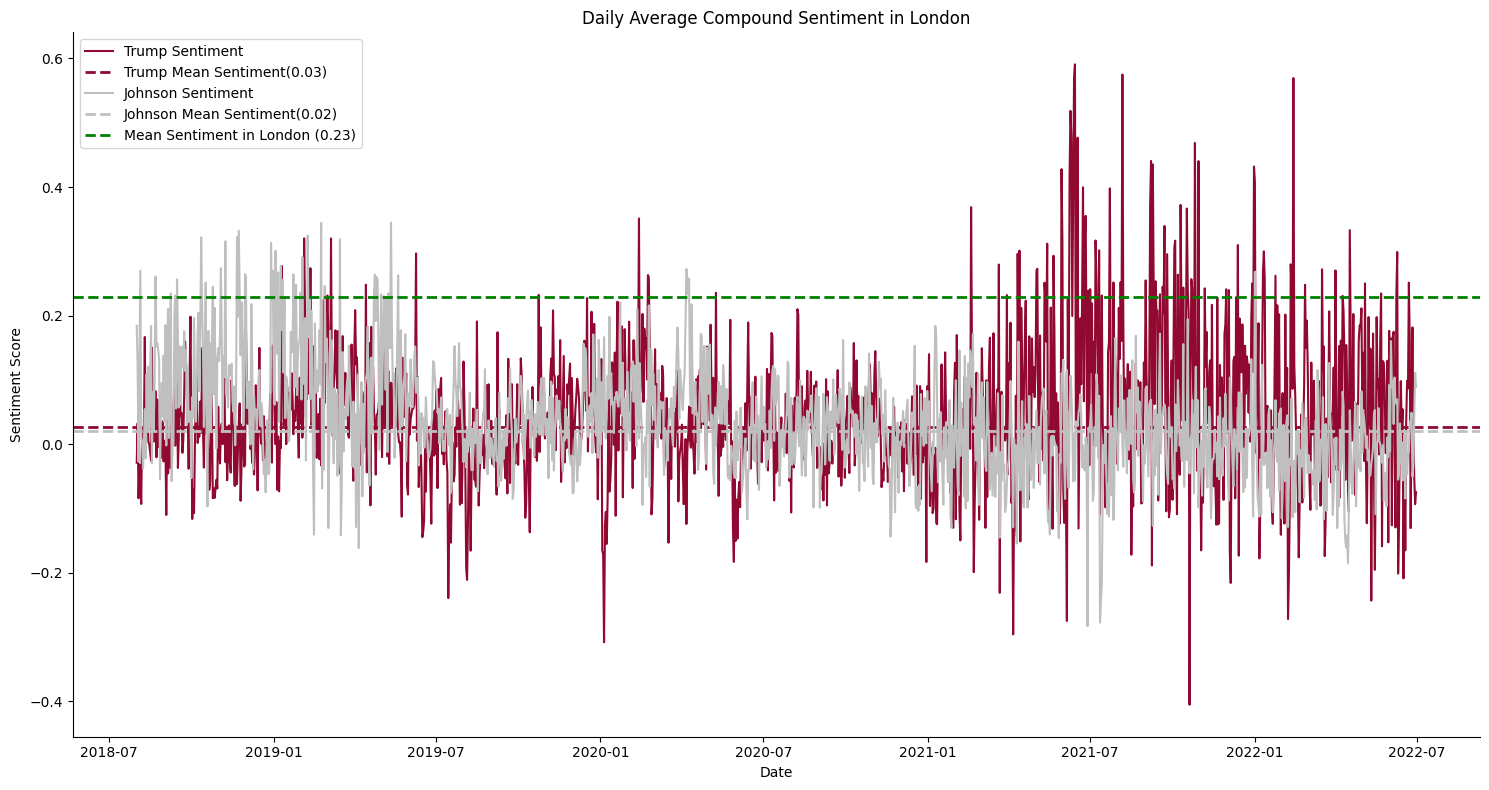

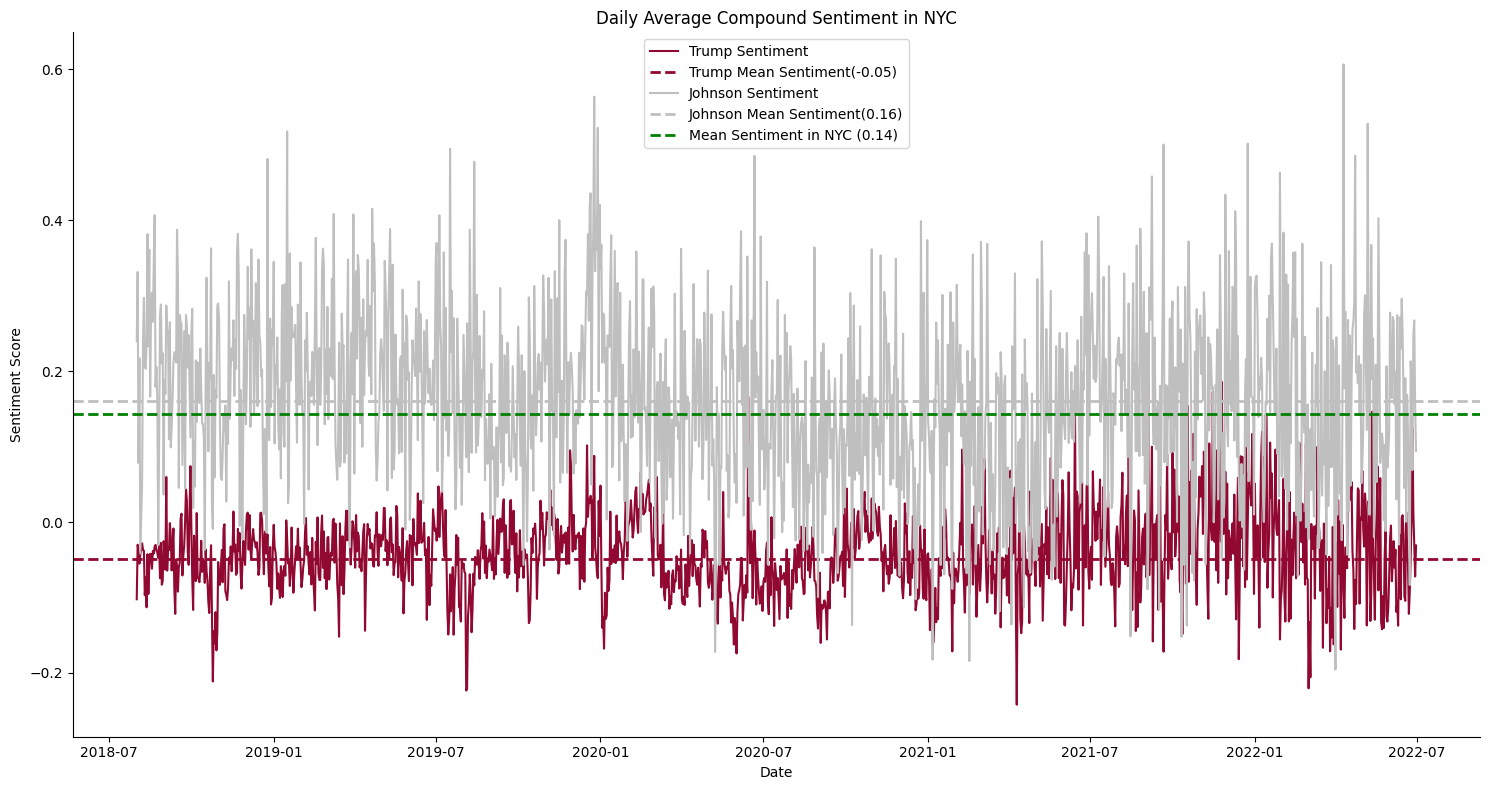

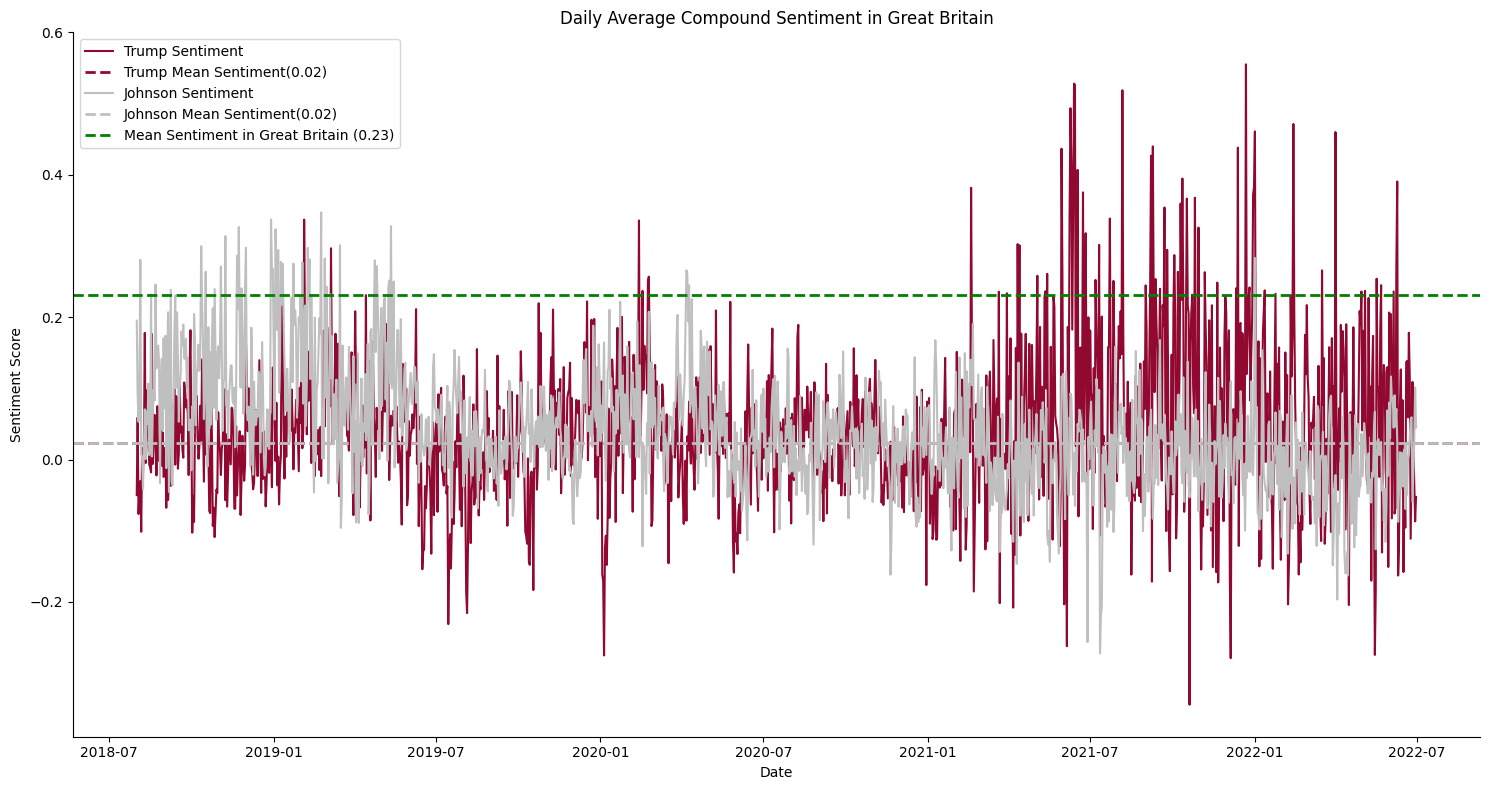

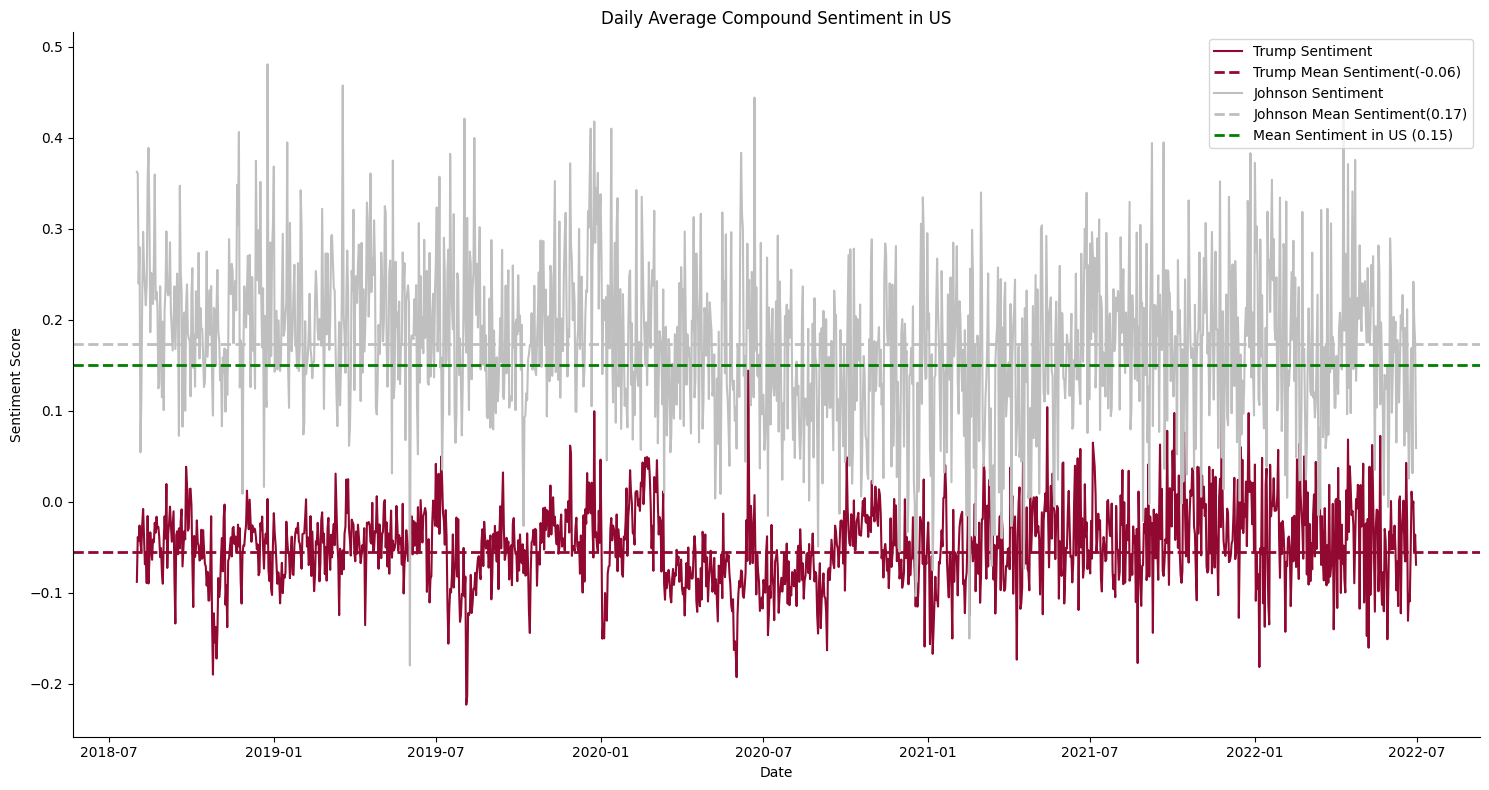

In [74]:
for location in (cities + countries):
    title = f'Daily Average Compound Sentiment in {location}'
    filepath_trump = f'{data_path}trump-{location}.pkl'
    filepath_johnson = f'{data_path}johnson-{location}.pkl'
    trump = pd.read_pickle(filepath_trump)
    johnson = pd.read_pickle(filepath_johnson)
    trump, trump_daily_sentiment = add_day_and_get_daily_sentiment(trump)
    johnson, johnson_daily_sentiment = add_day_and_get_daily_sentiment(johnson)
    trump_average_compound = get_compound_mean(trump)
    johnson_average_compound = get_compound_mean(johnson)
    presidents_daily_sentiment = trump_daily_sentiment.rename(columns={'Compound': presidents[0]})
    presidents_daily_sentiment[presidents[1]] = johnson_daily_sentiment['Compound']
    
    plot_sentiment_with_highlights_and_timeframes(presidents_daily_sentiment,
                                            title=title,
                                            location=location,
                                            columns=['trump', 'johnson'],
                                            averages=[trump_average_compound, johnson_average_compound],
                                            mean_location=mean_compound.at['All',location],
                                            colors=colors,
                                            save_path=f'visualizations/compound_sentiment/presidents-{location}.png')

# Aggregated Tweet Count

Method: 
1. Data Aggregation: Aggregate the data into daily counts with `aggregate_tweet_count()`
2. 

##### Data Aggregation

In [100]:
def aggregate_daily_counts(df, date_column='day'):
    """
    Aggregate the total count of rows for each day in a dataframe.

    Parameters:
    df (DataFrame): The original dataframe with a 'day' column.
    date_column (str): The name of the column containing the dates. Defaults to 'day'.

    Returns:
    DataFrame: A new dataframe with columns 'day' and 'tweet_count', representing the count of rows per day.
    """
    return df.groupby(date_column).size().reset_index(name='tweet_count')

def aggregate_tweet_count(president):
    daily_tweet_counts = pd.DataFrame(columns=['day', 'All'] + countries + cities)
    for location in countries + cities:
        filepath = f'{data_path}{president}-{location}.pkl'
        # load data
        data = pd.read_pickle(filepath)
        # add day
        data, _ = add_day_and_get_daily_sentiment(data)
        # aggregate day to get daily tweet count
        aggregated_data = aggregate_daily_counts(data)
        daily_tweet_counts[location] = aggregated_data['tweet_count']
    daily_tweet_counts['day'] = aggregated_data['day']
    daily_tweet_counts.set_index('day')
    # calculate 'All'
    filepath = f'{data_path}{president}.pkl'
    data = pd.read_pickle(filepath)
    data, _ = add_day_and_get_daily_sentiment(data)
    aggregated_data = aggregate_daily_counts(data)
    daily_tweet_counts['All'] = aggregated_data['tweet_count']
    return daily_tweet_counts

In [104]:
# aggregate daily tweets for both presidents
daily_tweet_counts_trump = aggregate_tweet_count(presidents[0])
daily_tweet_counts_johnson = aggregate_tweet_count(presidents[1])
# save data
daily_tweet_counts_trump.to_pickle(f'{data_path}daily_tweet_counts_trump.pkl')
daily_tweet_counts_johnson.to_pickle(f'{data_path}daily_tweet_counts_johnson.pkl')

Inspect data to verify data quality

In [105]:
daily_tweet_counts_trump.head()

day   All  Great Britain    US  Birmingham    LA  London  NYC
0  2018-08-01  2069            191  1878        15.0   969     176  909
1  2018-08-02  1724            161  1563        18.0   736     143  827
2  2018-08-03  1400            146  1254        14.0   623     132  631
3  2018-08-04  2258            188  2070        18.0  1243     170  827
4  2018-08-05  1815            197  1618        27.0   807     170  811

In [106]:
daily_tweet_counts_johnson.head()

day  All  Great Britain  US  Birmingham  LA  London  NYC
0  2018-08-01  154             89  65          24  39      65   26
1  2018-08-02  149             57  92          10  53      47   39
2  2018-08-03  126             46  80           7  51      39   29
3  2018-08-04  125             59  66          12  41      47   25
4  2018-08-05  137             58  79          17  28      41   51

##### 

In [107]:
def get_mean_tweets_per_day(president):
    # get an overview of mean tweets per day in each location
    # get total tweet count to get the mean tweets per day independent from the presidents
    total_count = pd.read_pickle('results/total_count.pkl')
    total_count = total_count.rename(columns={"Total": "All"})
    
    # get president-related mean tweets per day
    locations = countries + cities
    tweets_per_day = pd.DataFrame(columns=locations)
    
    # load president-related data to get the number of days (data.shape[0])
    data = daily_tweet_counts_trump if president == presidents[0] else daily_tweet_counts_johnson
    for col in locations:
        tweets_per_day.at['All', col] = total_count.at['All', col] / data.shape[0]
    
    population_key = 'Population'
    # population in million - based on Google search on 03.02.2024
    tweets_per_day.at[population_key, 'NYC'] = 8468
    tweets_per_day.at[population_key, 'LA'] = 3849
    tweets_per_day.at[population_key, 'Birmingham'] = 1149
    tweets_per_day.at[population_key, 'London'] = 8982
    tweets_per_day.at[population_key, 'Great Britain'] = tweets_per_day.at[population_key, 'Birmingham'] + tweets_per_day.at[population_key, 'London']
    tweets_per_day.at[population_key, 'US'] = tweets_per_day.at[population_key, 'LA'] + tweets_per_day.at[population_key, 'NYC']

    tweets_per_day.loc['Posts per Inhabitant'] = tweets_per_day.loc['All'] / tweets_per_day.loc[population_key]

    # tweets_per_day.to_pickle(f'{data_path}tweets_per_day.pkl')
    return tweets_per_day

get_mean_tweets_per_day(presidents[1])

Great Britain            US   Birmingham            LA  \
All                   26079.681818  54831.086713  4999.236364  28985.386713   
Population                   10131         12317         1149          3849   
Posts per Inhabitant      2.574246      4.451659     4.350945      7.530628   

                            London       NYC  
All                   21080.445455   25845.7  
Population                    8982      8468  
Posts per Inhabitant      2.346966  3.052161

In [108]:
import pandas as pd
monthly_tweet_count = pd.read_pickle('results/monthly_tweet_count.pkl')
monthly_tweet_count

2018_08    2018_09    2018_10    2018_11    2018_12  \
Birmingham      191433.0   191579.0   210056.0   196021.0   191220.0   
LA             1171088.0  1154324.0  1231818.0  1112827.0  1081696.0   
London          788735.0   823528.0   852263.0   825937.0   788404.0   
NYC            1038041.0  1077902.0  1118985.0  1012020.0   984489.0   
Great Britain   980168.0  1015107.0  1062319.0  1021958.0   979624.0   
US             2209129.0  2232226.0  2350803.0  2124847.0  2066185.0   

                 2019_01    2019_02    2019_03    2019_04    2019_05  ...  \
Birmingham      192694.0   180492.0   176343.0   171053.0   189581.0  ...   
LA             1181323.0  1086208.0   925107.0   965585.0  1000215.0  ...   
London          833817.0   761305.0   745724.0   701682.0   779578.0  ...   
NYC            1008954.0   911139.0   817539.0   844749.0   891154.0  ...   
Great Britain  1026511.0   941797.0   922067.0   872735.0   969159.0  ...   
US             2190277.0  1997347.0  1742646.0  1810334.0  1891369.0  ...   

                 2021_09    2021_10    2021_11    2021_12   2022_01   2022_02  \
Birmingham      117748.0   115224.0   115670.0   120246.0   92343.0   83309.0   
LA              619445.0   661769.0   605353.0   587364.0  419469.0  441942.0   
London          468218.0   485879.0   464786.0   467816.0  354041.0  330898.0   
NYC             610744.0   610459.0   582877.0   574649.0  423957.0  404103.0   
Great Britain   585966.0   601103.0   580456.0   588062.0  446384.0  414207.0   
US             1230189.0  1272228.0  1188230.0  1162013.0  843426.0  846045.0   

                 2022_03    2022_04    2022_05    2022_06  
Birmingham      101421.0   108992.0   125573.0   123247.0  
LA              551023.0   561438.0   626102.0   627947.0  
London          399953.0   411581.0   485100.0   473426.0  
NYC             518088.0   505101.0   561737.0   602978.0  
Great Britain   501374.0   520573.0   610673.0   596673.0  
US             1069111.0  1066539.0  1187839.0  1230925.0  

[6 rows x 47 columns]

In [109]:
daily_tweet_counts_trump.head()

day   All  Great Britain    US  Birmingham    LA  London  NYC
0  2018-08-01  2069            191  1878        15.0   969     176  909
1  2018-08-02  1724            161  1563        18.0   736     143  827
2  2018-08-03  1400            146  1254        14.0   623     132  631
3  2018-08-04  2258            188  2070        18.0  1243     170  827
4  2018-08-05  1815            197  1618        27.0   807     170  811

In [110]:
def normalize_daily_tweet_counts(daily_tweet_counts, monthly_tweet_count):
    # Convert the 'day' column in daily_tweet_counts to datetime to easily extract year and month
    daily_tweet_counts['day'] = pd.to_datetime(daily_tweet_counts['day'])
    
    # For each location, normalize the daily tweet count
    locations = ['Birmingham', 'LA', 'London', 'NYC', 'Great Britain', 'US']
    
    for location in locations:
        # Apply normalization for each row
        daily_tweet_counts[location] = daily_tweet_counts.apply(lambda row: normalize_row(row, location, monthly_tweet_count), axis=1)
    
    return daily_tweet_counts

def normalize_row(row, location, monthly_tweet_count):
    # Extract year and month from the 'day' column
    year_month = row['day'].strftime('%Y_%m')
    
    # Lookup the monthly tweet count for the location
    monthly_count = monthly_tweet_count.loc[location, year_month]
    
    # Return the normalized daily count
    return row[location] / monthly_count if monthly_count else row[location]

In [111]:
normalized_daily_tweet_counts_trump = normalize_daily_tweet_counts(daily_tweet_counts_trump, monthly_tweet_count)
normalized_daily_tweet_counts_johnson = normalize_daily_tweet_counts(daily_tweet_counts_johnson, monthly_tweet_count)

In [112]:
monthly_tweet_count

2018_08    2018_09    2018_10    2018_11    2018_12  \
Birmingham      191433.0   191579.0   210056.0   196021.0   191220.0   
LA             1171088.0  1154324.0  1231818.0  1112827.0  1081696.0   
London          788735.0   823528.0   852263.0   825937.0   788404.0   
NYC            1038041.0  1077902.0  1118985.0  1012020.0   984489.0   
Great Britain   980168.0  1015107.0  1062319.0  1021958.0   979624.0   
US             2209129.0  2232226.0  2350803.0  2124847.0  2066185.0   

                 2019_01    2019_02    2019_03    2019_04    2019_05  ...  \
Birmingham      192694.0   180492.0   176343.0   171053.0   189581.0  ...   
LA             1181323.0  1086208.0   925107.0   965585.0  1000215.0  ...   
London          833817.0   761305.0   745724.0   701682.0   779578.0  ...   
NYC            1008954.0   911139.0   817539.0   844749.0   891154.0  ...   
Great Britain  1026511.0   941797.0   922067.0   872735.0   969159.0  ...   
US             2190277.0  1997347.0  1742646.0  1810334.0  1891369.0  ...   

                 2021_09    2021_10    2021_11    2021_12   2022_01   2022_02  \
Birmingham      117748.0   115224.0   115670.0   120246.0   92343.0   83309.0   
LA              619445.0   661769.0   605353.0   587364.0  419469.0  441942.0   
London          468218.0   485879.0   464786.0   467816.0  354041.0  330898.0   
NYC             610744.0   610459.0   582877.0   574649.0  423957.0  404103.0   
Great Britain   585966.0   601103.0   580456.0   588062.0  446384.0  414207.0   
US             1230189.0  1272228.0  1188230.0  1162013.0  843426.0  846045.0   

                 2022_03    2022_04    2022_05    2022_06  
Birmingham      101421.0   108992.0   125573.0   123247.0  
LA              551023.0   561438.0   626102.0   627947.0  
London          399953.0   411581.0   485100.0   473426.0  
NYC             518088.0   505101.0   561737.0   602978.0  
Great Britain   501374.0   520573.0   610673.0   596673.0  
US             1069111.0  1066539.0  1187839.0  1230925.0  

[6 rows x 47 columns]

In [113]:
normalized_daily_tweet_counts_trump.to_pickle(f'{data_path}normalized_daily_tweet_counts_trump.pkl')
normalized_daily_tweet_counts_johnson.to_pickle(f'{data_path}normalized_daily_tweet_counts_johnson.pkl')

In [114]:
def normalize(df, cols, divisors=total_count):
    """
    Normalizes the specified columns in the dataframe by dividing by the mean number of daily posts in the specific location.

    Parameters:
    df (DataFrame): The dataframe containing the data.
    cols (list): A list of column names to be normalized.

    Returns:
    DataFrame: A dataframe with the specified columns normalized.
    """
    normalized_df = df.copy()
    for col in cols:
        # divisor is the mean number of tweets per day
        divisor = divisors.at['All', col] / data.shape[0]
        normalized_df[col] = df[col] / divisor if divisor != 0 else df[col]
    return normalized_df


In [115]:
def plot_daily_tweet_counts(tweet_counts, title, count_columns, colors=colors, timeframe=None, save_path=None, highlight_top_ten=None):
    """
    Plot the daily tweet counts for multiple series with a modern design, including options for highlights and timeframes. Highlights the top ten tweet counts for each series.

    Parameters:
    tweet_counts (DataFrame): Data containing the daily tweet counts with columns 'day' and multiple 'tweet_count_X' columns.
    title (str): The title of the plot.
    count_columns (list): List of column names containing the tweet counts to be plotted.
    colors (list, optional): Colors for the tweet count lines. If None, default colors will be used.
    timeframe (tuple of str/datetime, optional): A timeframe to highlight on the plot.
    save_path (str, optional): Path to save the figure.
    highlight_top_ten (bool, optional): Whether to highlight the top ten tweet counts.
    """
    plt.figure(figsize=(15, 8))
    
    if colors is None:
        colors = sns.color_palette('husl', len(count_columns))  # Generate as many colors as count columns
    
    # Plot each tweet count line
    for i, count_column in enumerate(count_columns):
        sns.lineplot(x='day', y=count_column, data=tweet_counts, color=colors[i], label=count_column)
        
        if highlight_top_ten:
            # Sort the DataFrame by 'tweet_count' column in descending order and take the top ten
            top_ten_tweet_counts = tweet_counts.sort_values(by=count_column, ascending=False).head(10)
            # Highlight the top ten tweet counts
            for _, row in top_ten_tweet_counts.iterrows():
                point_datetime = pd.to_datetime(row['day'])
                tweet_count_at_point = row[count_column]
                plt.scatter(point_datetime, tweet_count_at_point, color=colors[i], s=50, zorder=5)
                # Adjusted text positioning
                text_x_position = point_datetime - pd.Timedelta(days=-10)  # Adjust as needed for your specific date format and plot
                plt.text(text_x_position, tweet_count_at_point, f"{row['day']}\n{tweet_count_at_point}", color='black', ha='left', va='bottom')

    # Highlight the timeframe
    if timeframe:
        plt.axvspan(pd.to_datetime(timeframe[0]), pd.to_datetime(timeframe[1]), color='yellow', alpha=0.3, label='Highlighted Period')

    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Tweet Count')
    sns.despine()
    plt.legend()
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, format='png', bbox_inches='tight')
    plt.show()

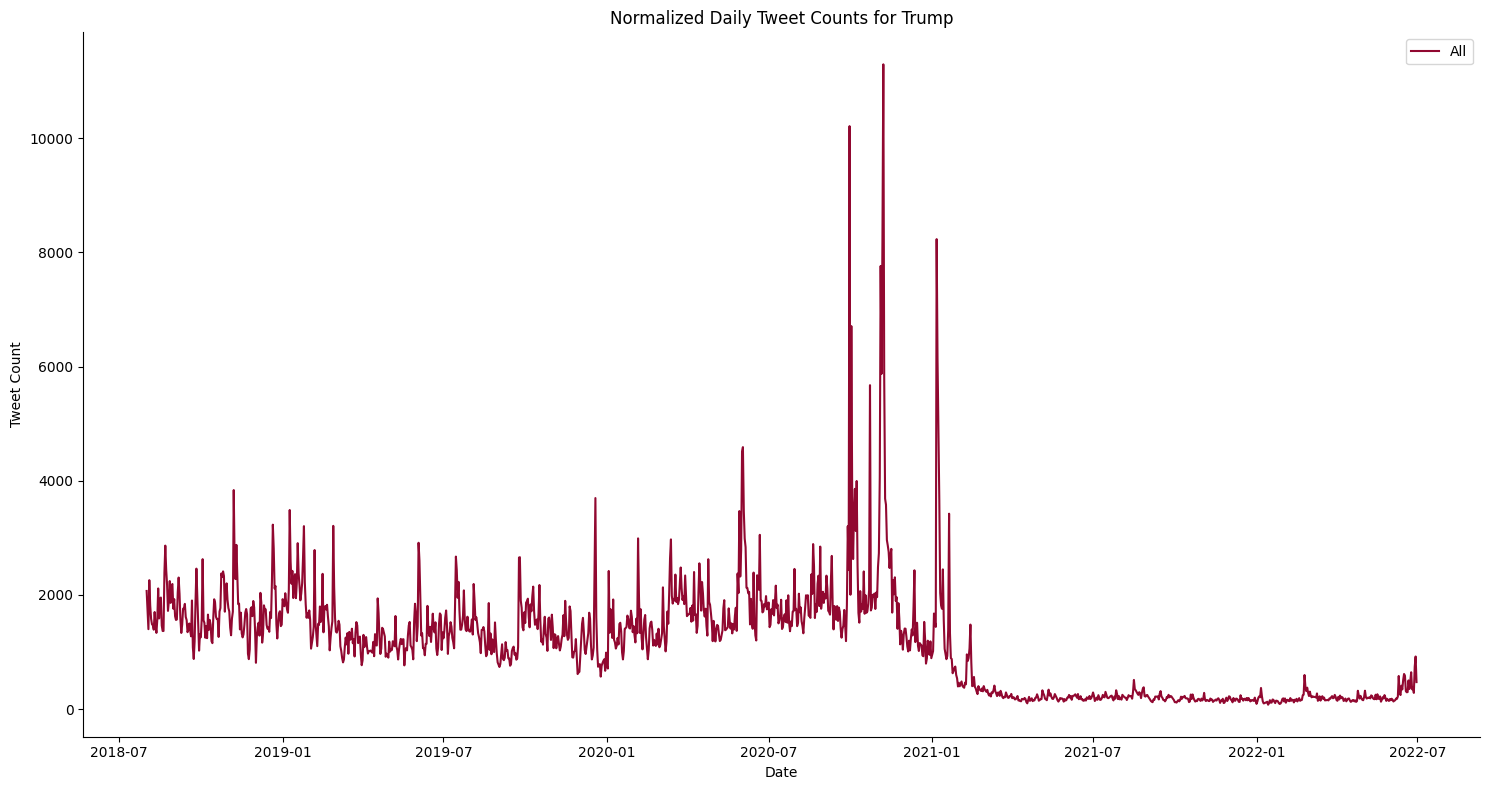

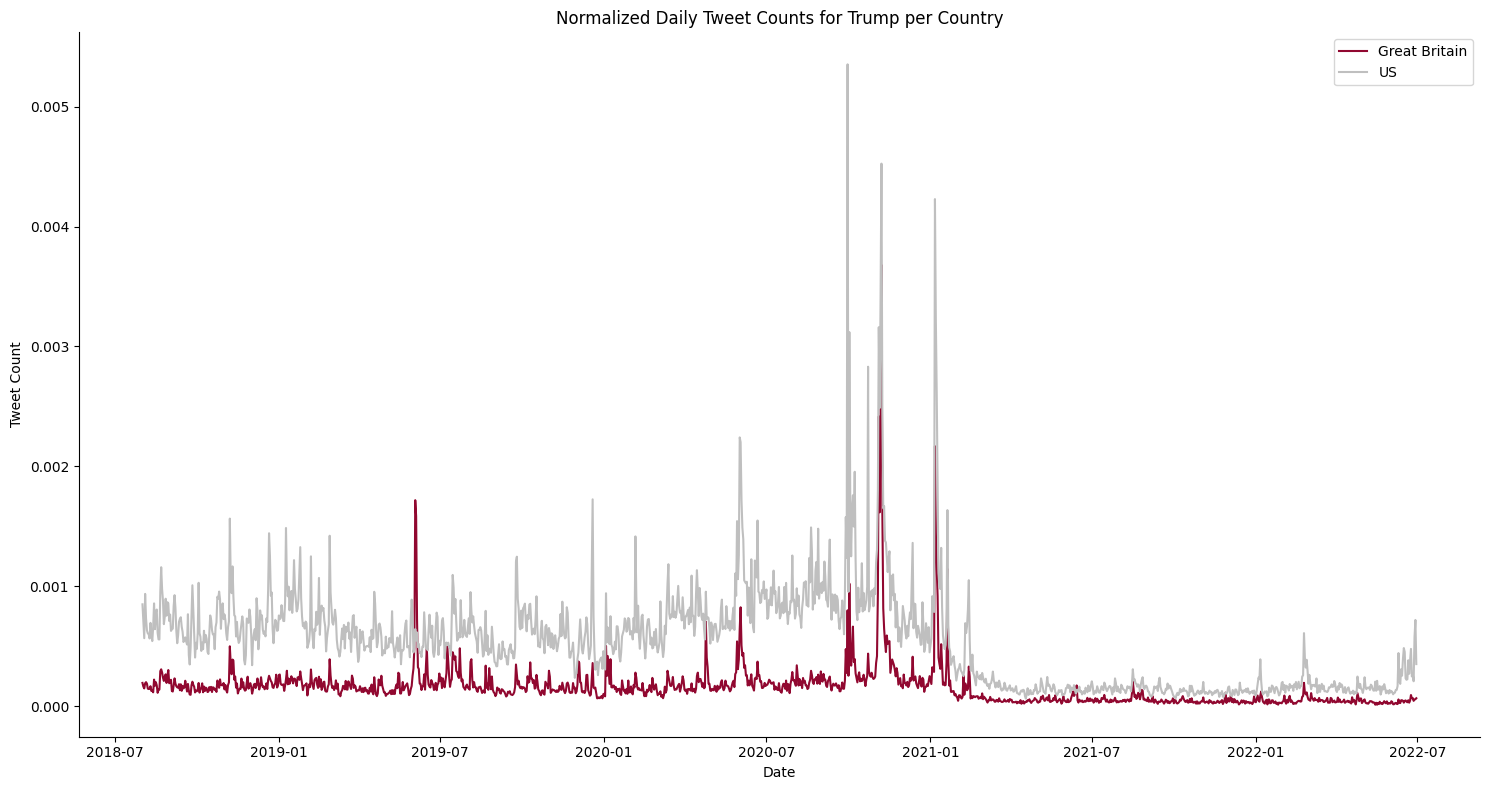

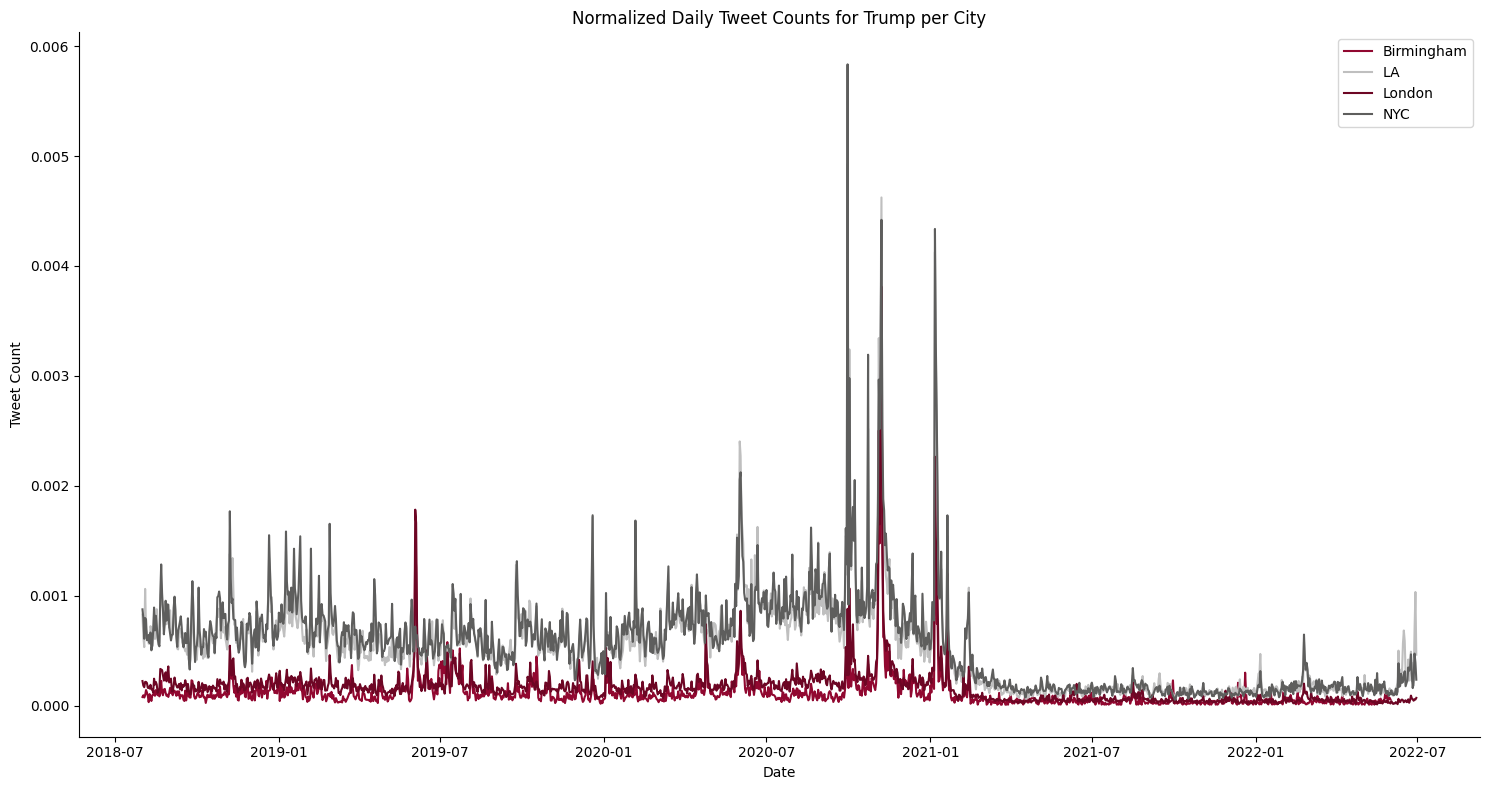

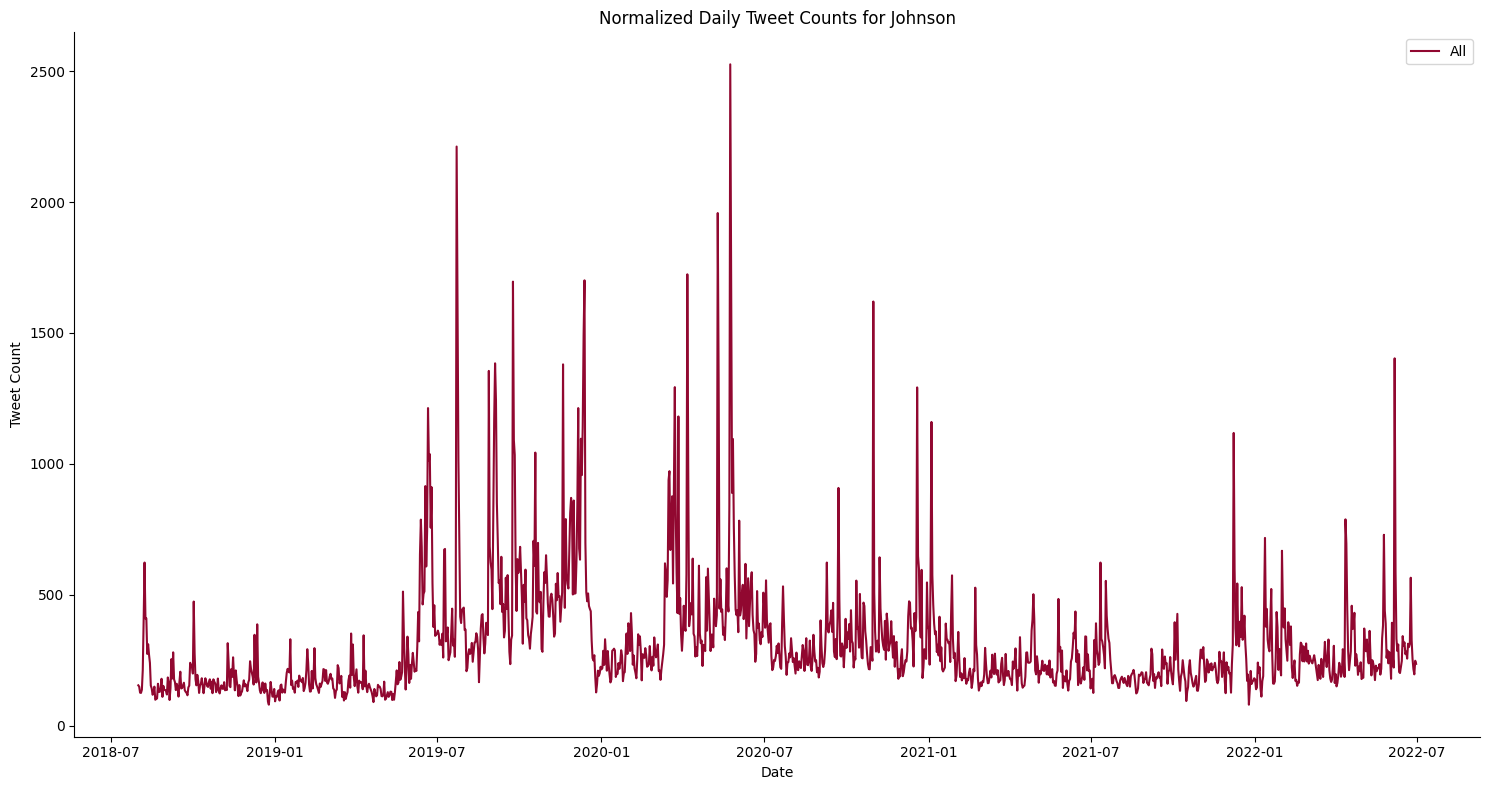

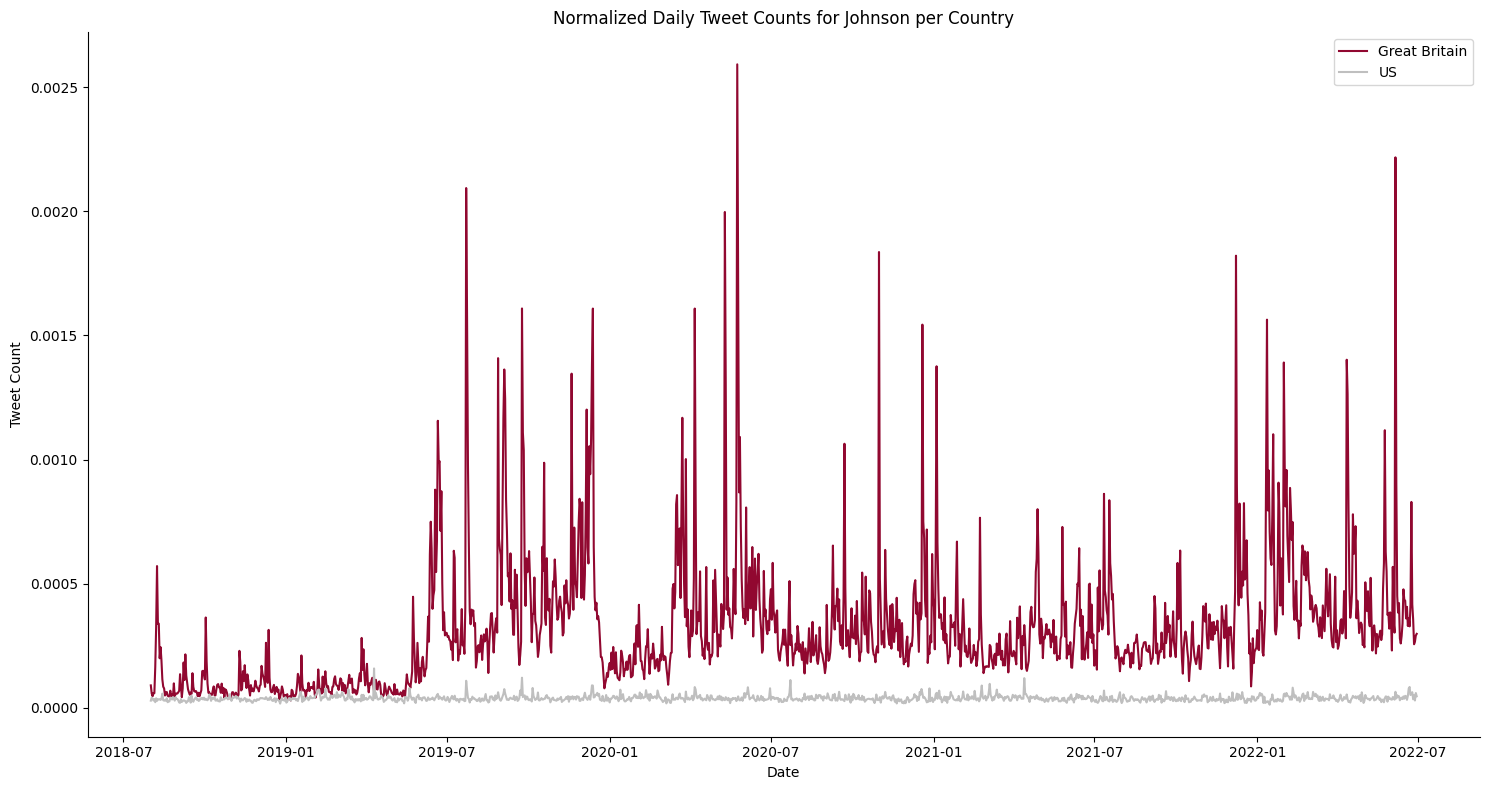

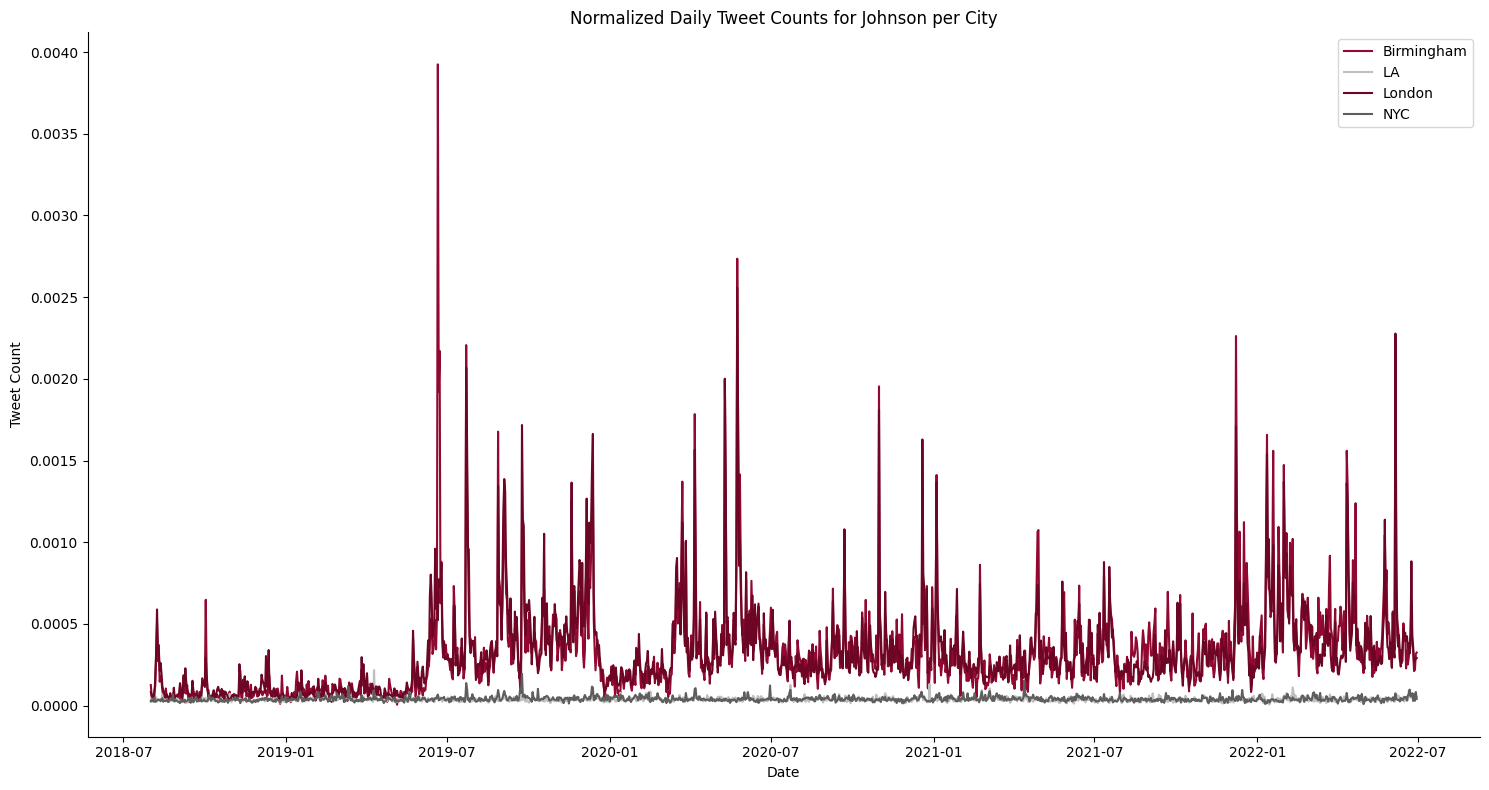

In [116]:
for president in presidents:
    data = normalized_daily_tweet_counts_trump if president == presidents[0] else normalized_daily_tweet_counts_johnson
    
    plot_daily_tweet_counts(
        tweet_counts=data,
        title=f"Normalized Daily Tweet Counts for {president.capitalize()}",
        count_columns=['All'],
        save_path=f'visualizations/tweet_count/{president}-normalized_tweet_count.png'  
    )

    plot_daily_tweet_counts(
        tweet_counts=data,
        title=f"Normalized Daily Tweet Counts for {president.capitalize()} per Country",
        count_columns=countries,
        save_path=f'visualizations/tweet_count/{president}-countries-normalized_tweet_count.png'
    )

    plot_daily_tweet_counts(
        tweet_counts=data,
        title=f"Normalized Daily Tweet Counts for {president.capitalize()} per City",
        count_columns=cities,
        save_path=f'visualizations/tweet_count/{president}-cities-normalized_tweet_count.png'
    )

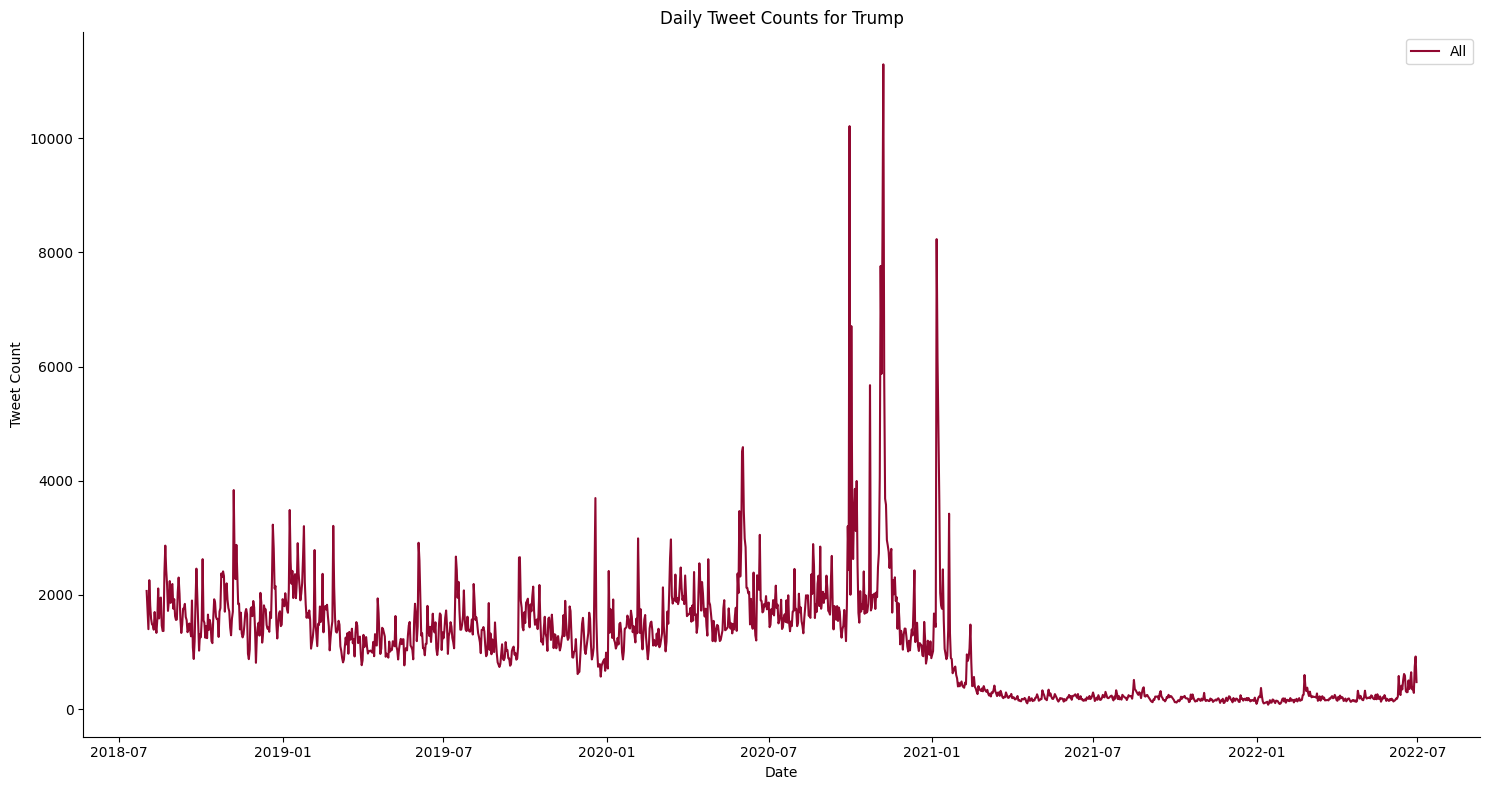

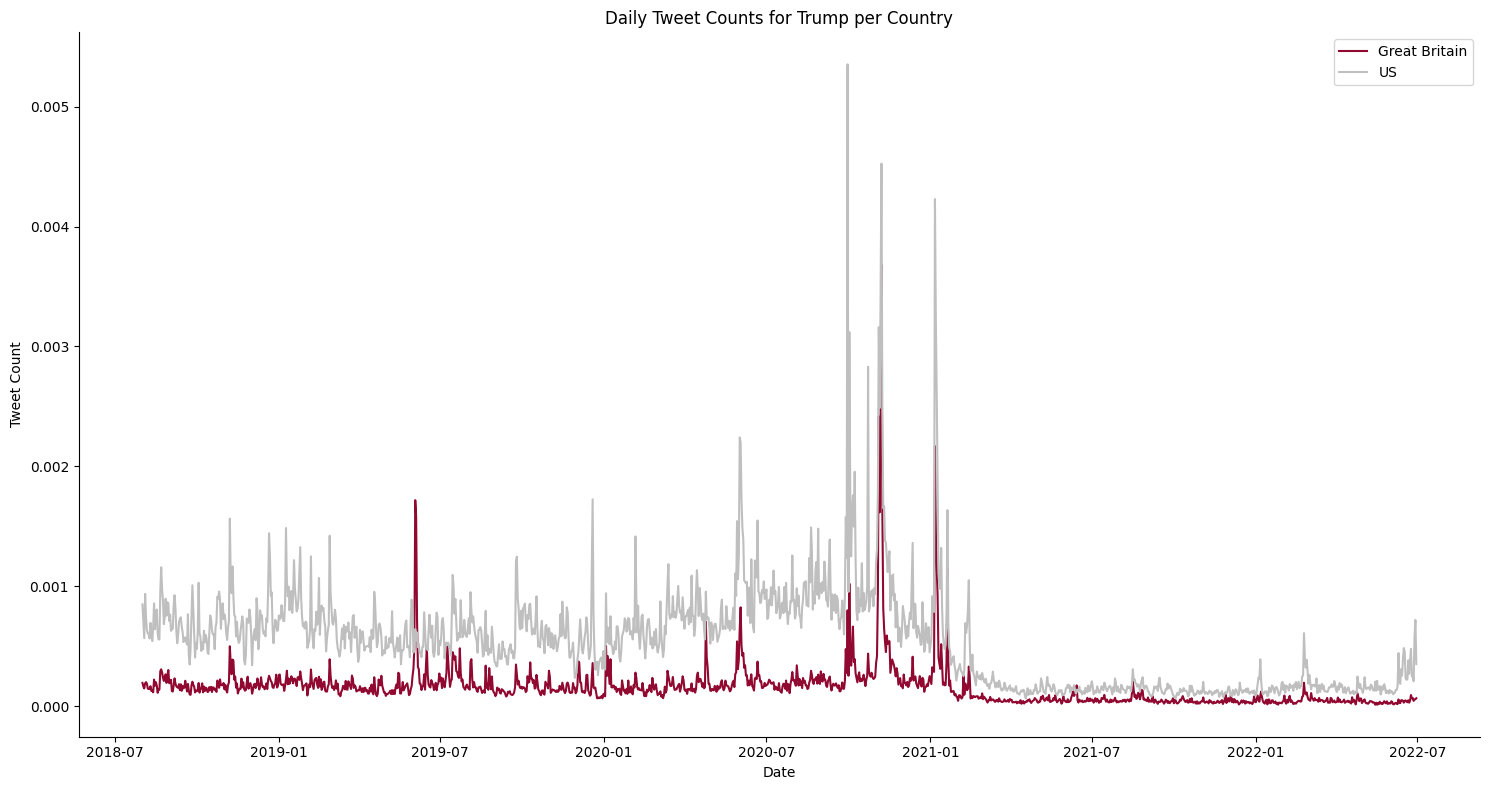

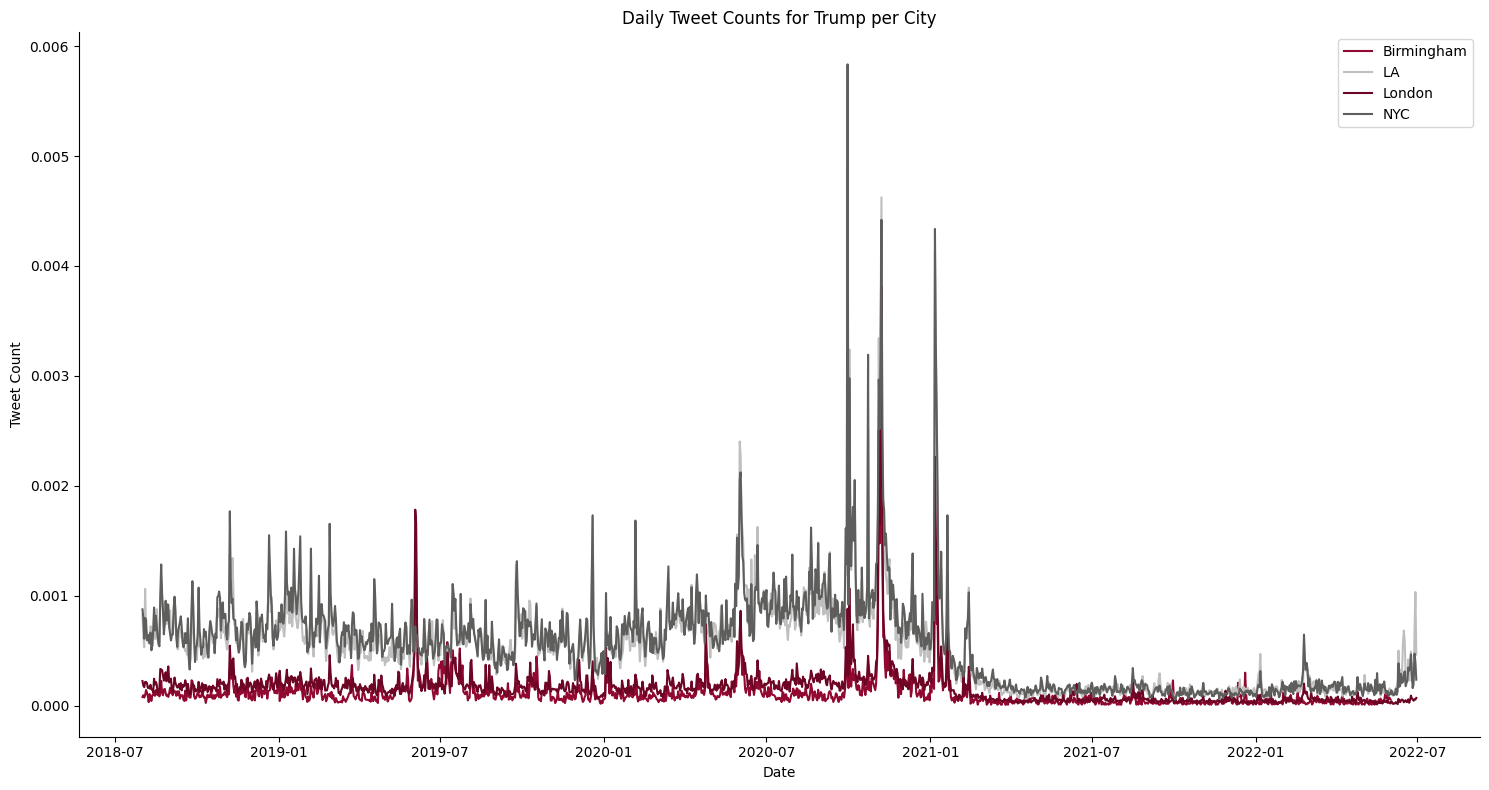

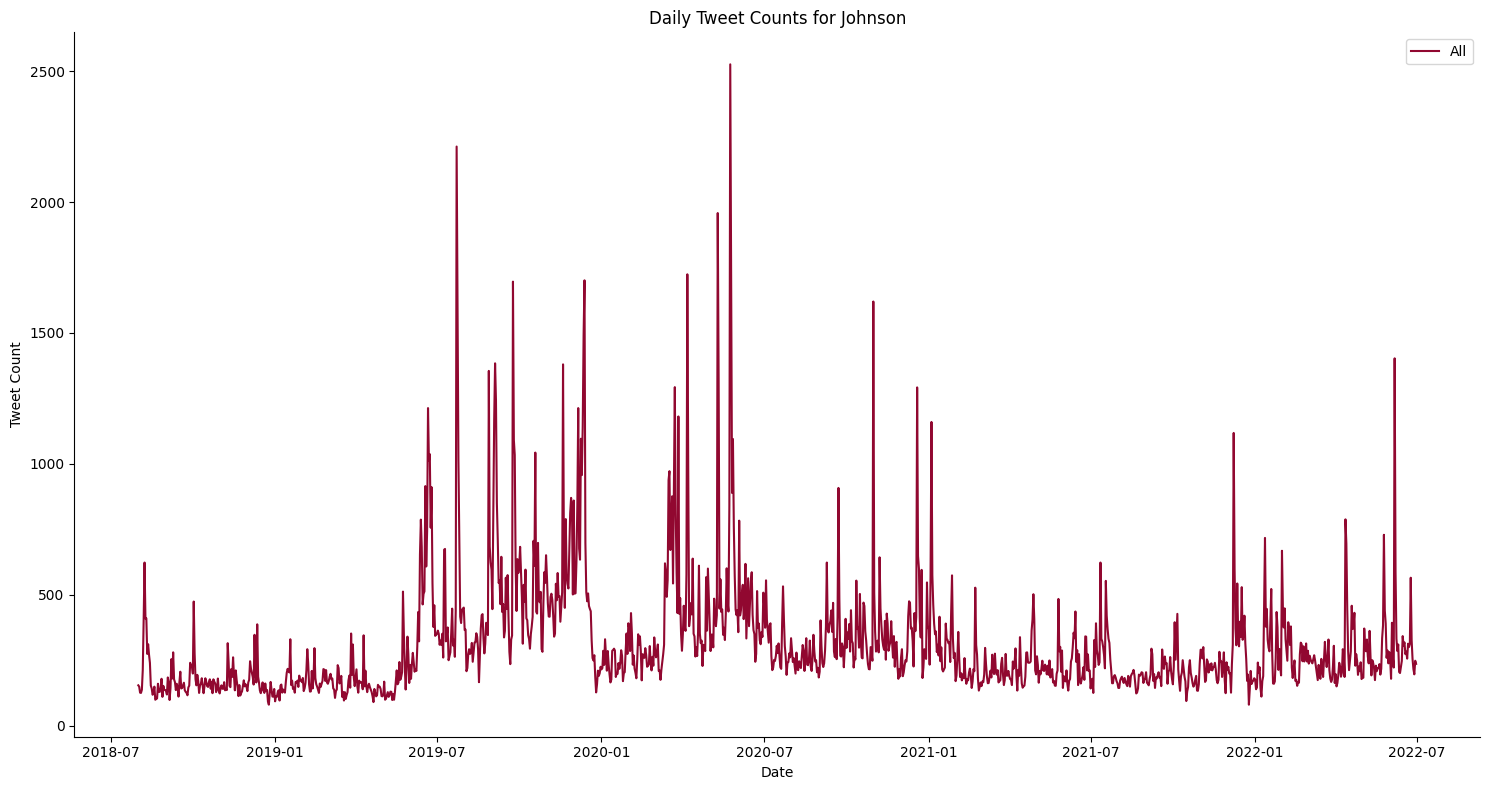

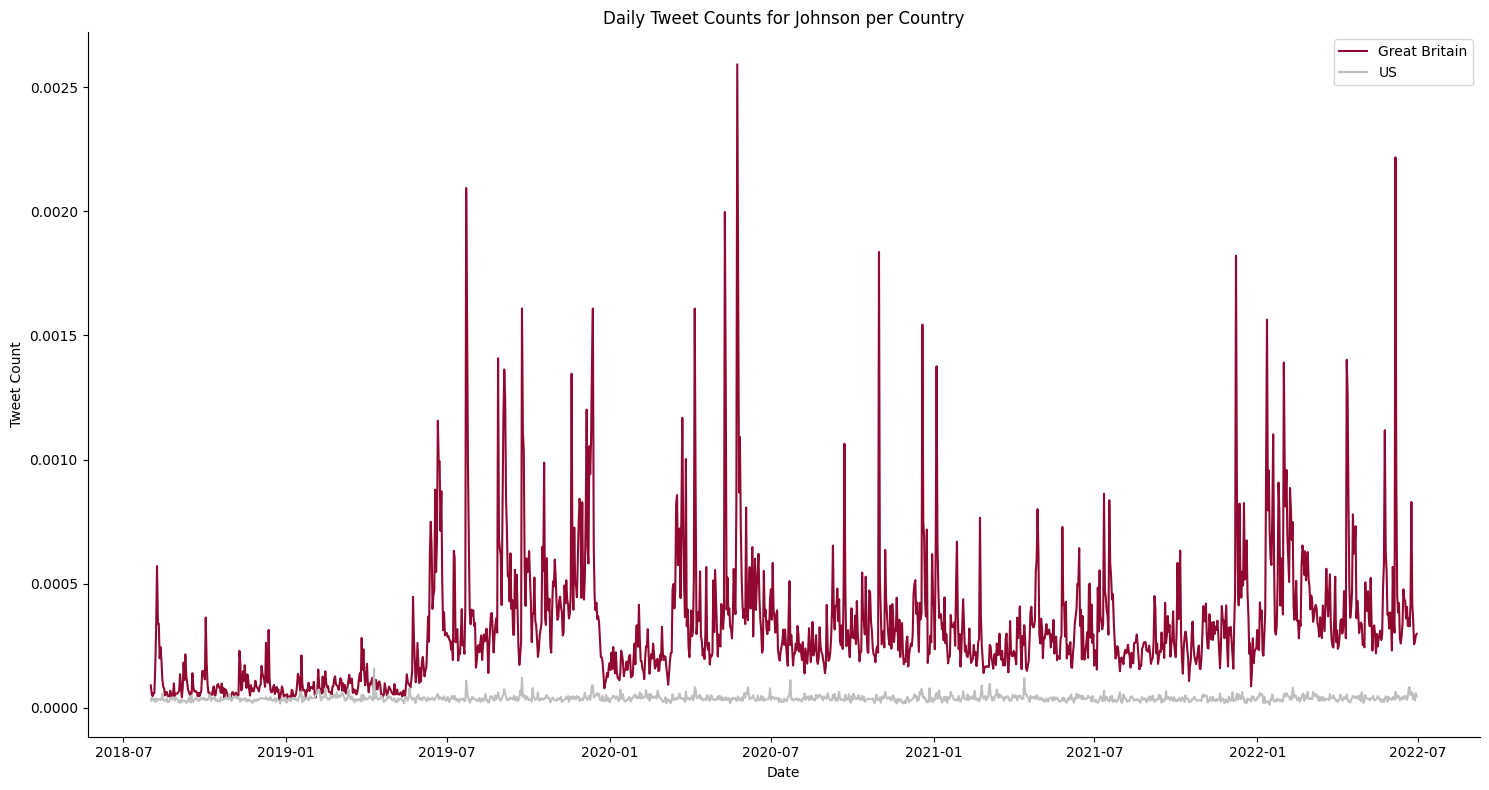

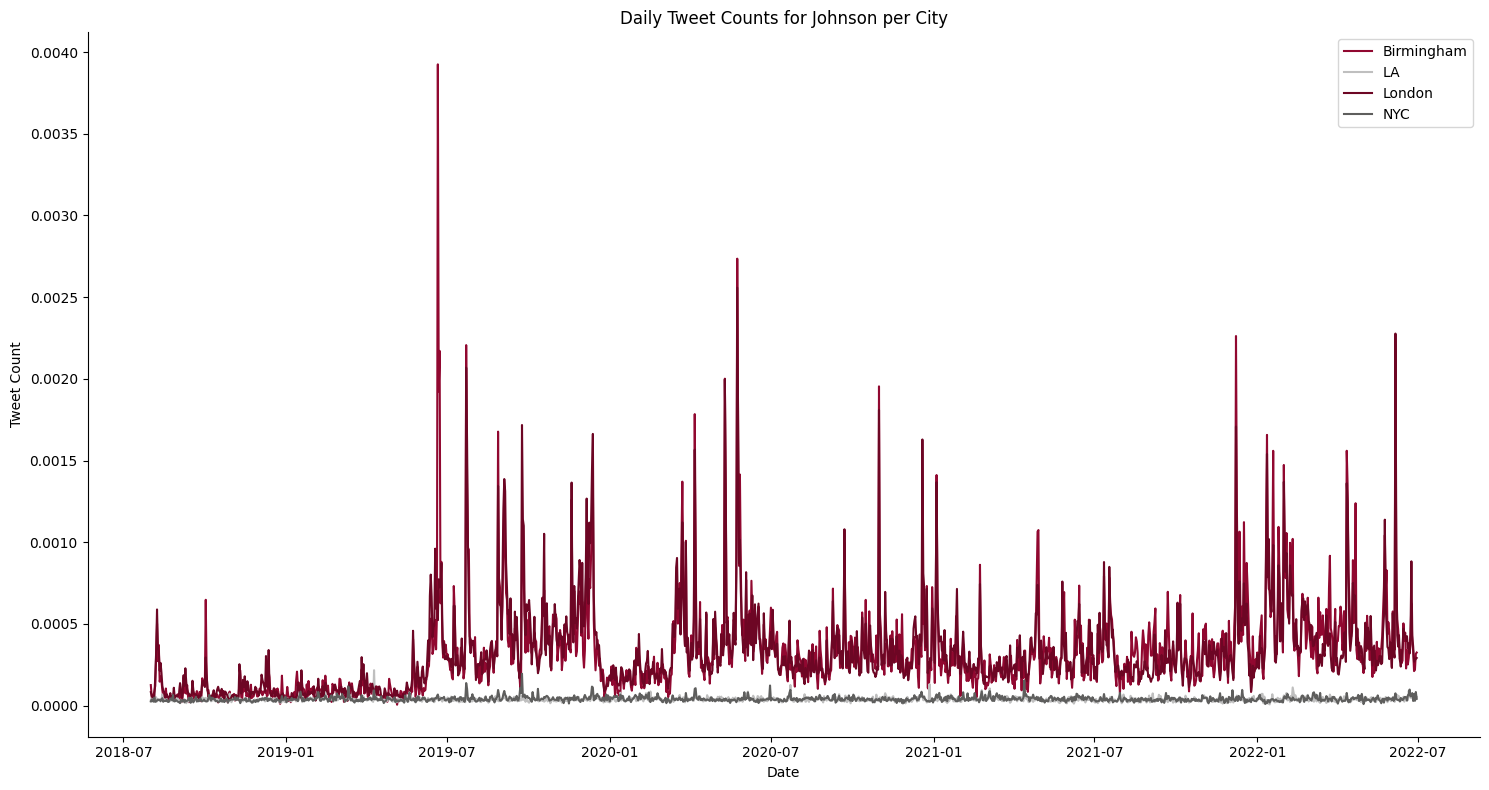

In [117]:
for president in presidents:
    data = daily_tweet_counts_trump if president == presidents[0] else daily_tweet_counts_johnson
    
    plot_daily_tweet_counts(
        tweet_counts=data,
        title=f"Daily Tweet Counts for {president.capitalize()}",
        count_columns=['All'],
        save_path=f'visualizations/tweet_count/{president}-tweet_count.png'  
    )

    plot_daily_tweet_counts(
        tweet_counts=data,
        title=f"Daily Tweet Counts for {president.capitalize()} per Country",
        count_columns=countries,
        save_path=f'visualizations/tweet_count/{president}-countries-tweet_count.png'
    )

    plot_daily_tweet_counts(
        tweet_counts=data,
        title=f"Daily Tweet Counts for {president.capitalize()} per City",
        count_columns=cities,
        save_path=f'visualizations/tweet_count/{president}-cities-tweet_count.png'
    )

### Interpretation Tweet Count

##### Absolute Values

In [118]:
def get_top_dates(df, column, nlargest=10):
    """
    Get the rows corresponding to the highest 10 values of a specified column in a DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    column (str): The name of the column to find the top 10 values in.

    Returns:
    DataFrame: A DataFrame containing the rows with the top 10 values of the specified column.
    """
    return df.nlargest(nlargest, column)

def get_top_ten_days(data, president):
    for location in countries + cities:
        print(president.capitalize(), location)
        print(get_top_dates(data, location)[['day', location]].to_string(index=False),"\n")

In [119]:
get_top_ten_days(daily_tweet_counts_trump, presidents[0])
get_top_ten_days(daily_tweet_counts_johnson, presidents[1])

Trump Great Britain
       day  Great Britain
2020-11-07       0.003680
2020-11-06       0.002424
2020-11-04       0.002417
2021-01-06       0.002168
2019-06-03       0.001718
2020-11-05       0.001617
2020-11-08       0.001617
2019-06-04       0.001586
2021-01-07       0.001453
2021-01-08       0.001146 

Trump US
       day       US
2020-09-30 0.005352
2020-11-07 0.004525
2021-01-06 0.004229
2020-11-06 0.003397
2021-01-07 0.003228
2020-11-04 0.003161
2020-10-02 0.003120
2020-10-23 0.002831
2021-01-08 0.002605
2020-11-05 0.002487 

Trump Birmingham
       day  Birmingham
2020-11-07    0.003101
2020-11-06    0.002126
2020-11-04    0.002042
2021-01-06    0.001774
2020-11-05    0.001476
2019-06-03    0.001438
2020-11-08    0.001411
2019-06-04    0.001258
2021-01-07    0.001134
2021-01-20    0.000923 

Trump LA
       day       LA
2020-09-30 0.004928
2020-11-07 0.004623
2021-01-06 0.004125
2020-11-06 0.003595
2020-11-04 0.003343
2020-10-02 0.003241
2021-01-07 0.003177
2021-01-08 0.002553


**Donald Trump**

✅ Overall
1. 2020-11-04 - 2020-11-08 (7761 + 5872 + 8198 + 11292 + 5804)
2. 2020-09-30 - 2020-10-02 (10210 + 6708)
3. 2021-01-06 - 2021-01-07 (8231 + 6127)
4. 2020-10-23 (5673)

✅ GB
1. 2020-11-04 - 2020-11-08 (1994 + 1334 + 2000 + 3036 + 1334)
2. 2019-06-03 - 2019-06-04 (1636 + 1510)
3. 2021-01-06 - 2021-01-07 (1680 + 1126)
4. 2021-01-20 (888)

✅ US
1. 2020-09-30 (9564) 
2. 2020-11-04 - 2020-11-08 (5767 + 4538 + 6198 + 8256 + 4470)
3. 2021-01-06 - 2021-01-07 (6551 + 5001)
4. 2010-10-02 (5841)
5. 2020-10-23 (5301)

✅ NYC
1. 2020-09-30 (4879) 
2. 2020-11-04 - 2020-11-08 (2620 + 2223 + 2814 + 3904 + 2219)
3. 2021-01-06 - 2021-01-07 (3292 + 2491)
4. 2020-10-23 (2766)
5. 2010-10-02 (2581)

✅ LA
1. 2020-09-30 - 2020-10-02 (4685 + 4685)
2. 2020-11-04 - 2020-11-07 (3147 + 2315 + 3384 + 4352)
3. 2021-01-06 - 2021-01-07 (3259 + 2510)
4. 2020-10-02 (3260)
5. 2020-10-23 (2535)
6. 2020-06-01 (2274)

✅ London
1. 2020-11-04 - 2020-11-08 (1680 + 1107 + 1673 + 2559 + 1117)
2. 2021-01-06 - 2021-01-07 (1411 + 954)
3. 2019-06-03 - 2019-06-04 (1381 + 1287)
4. 2021-01-08 (775) - outlier

✅ Birmingham
1. 2020-11-04 - 2020-11-07 (314 + 227 + 327 + 477)
2. 2021-01-06 - 2021-01-07 (269 + 172)
3. 2019-06-03 - 2019-06-04 (255 + 223)
4. 2020-11-08 (217) 
5. 2021-01-20 (140)


**Boris Johnson**

✅ Overall
1. 2020-05-24 - 2020-05-25 (2526 + 1737)
2. 2019-07-23 - 2019-07-24 (2212 + 1637)
3. 2020-05-10 (1958)
4. 2020-04-06 (1724)
5. 2019-12-12 - 2019-12-13 (1492 + 1701)
6. 2019-09-24 (1646)
7. 2020-10-31 (1620)

✅ GB
1. 2020-05-24 - 2020-05-25 (2463 + 1491)
2. 2019-07-23 - 2019-07-24 (1988 + 1637)
3. 2020-05-10 (1898)
The rest is roughly on a similar level:
4. 2020-10-31 (1556)
5. 2020-04-06 (1553)
6. 2019-12-13 (1526)
7. 2019-09-24 (1460)
8. 2022-06-06 (1323)

✅ US: completely different to GB. Different dates etc.
1. 2019-04-10 (288)
2. 2020-04-06 (171)
3. 2019-09-24 (236)
4. 2019-07-23 (224)
5. 2020-07-23 (198)
6. 2019-12-12 - 2019-12-13 (177 + 175)
7. 2019-10-06 (168)
8. 2019-02-14 (157)
9. 2019-05-20 (152)

✅ LA
1. 2019-04-10 (209)
2. 2020-07-23 (120)
3. 2020-12-27 (104)
4. 2019-02-14 (101)
5. 2019-07-23 (97)
6. 2019-02-05 + 2019-02-07 (94 + 96)
7. 2020-02-16 (91)
8. 2018-10-29 (90)
9. 2019-10-06 (89)


✅ Johnson NYC: US cities differ completely
1. 2019-09-22 + 2019-09-24 (97 + 174)
2. 2019-07-23 - 2019-07-24 (95 + 127)
3. 2019-12-12 - 2019-12-13 (102 + 97)
4. 2020-06-30 (101)
5. 2019-10-12 (98)
6. 2020-04-07 (96)
7. 2019-03-12 (95)  

✅ London
1. 2020-05-24 - 2020-05-25 (1964 + 1349)
2. 2019-07-23 (1602)
3. 2020-05-10 (1533)
4. 2019-12-13 (1277)
5. 2019-09-24 (1272)
6. 2019-07-24 (1251)
7. 2020-10-31 (1251)
8. 2020-04-06 (1221)
9. 2019-12-12 (1106)
    

✅ Birmingham: 2019-06-21 - 2019-06-23 relevant in BI, but not in LO; 2019-09-24, 2019-07-24, 2020-04-06, 2019-12-12 in LO, but not BI
1. 2019-06-21 - 2019-06-23 (696 + 341 + 385)
2. 2020-05-24 - 2020-05-25 (499 + 299)
3. 2019-07-23 (386)
4. 2020-05-10 (365)
5. 2020-04-06 (332)
6. 2020-10-31 (305)
7. 2019-08-28 (284)

After one or at maximum 4 days, Twitter does not talk about scandals as much ->  News seem to become irrelevant after a couple of days

##### Normalized Values

In [120]:
get_top_ten_days(normalized_daily_tweet_counts_trump, presidents[0])
get_top_ten_days(normalized_daily_tweet_counts_johnson, presidents[1])

Trump Great Britain
       day  Great Britain
2020-11-07       0.003680
2020-11-06       0.002424
2020-11-04       0.002417
2021-01-06       0.002168
2019-06-03       0.001718
2020-11-05       0.001617
2020-11-08       0.001617
2019-06-04       0.001586
2021-01-07       0.001453
2021-01-08       0.001146 

Trump US
       day       US
2020-09-30 0.005352
2020-11-07 0.004525
2021-01-06 0.004229
2020-11-06 0.003397
2021-01-07 0.003228
2020-11-04 0.003161
2020-10-02 0.003120
2020-10-23 0.002831
2021-01-08 0.002605
2020-11-05 0.002487 

Trump Birmingham
       day  Birmingham
2020-11-07    0.003101
2020-11-06    0.002126
2020-11-04    0.002042
2021-01-06    0.001774
2020-11-05    0.001476
2019-06-03    0.001438
2020-11-08    0.001411
2019-06-04    0.001258
2021-01-07    0.001134
2021-01-20    0.000923 

Trump LA
       day       LA
2020-09-30 0.004928
2020-11-07 0.004623
2021-01-06 0.004125
2020-11-06 0.003595
2020-11-04 0.003343
2020-10-02 0.003241
2021-01-07 0.003177
2021-01-08 0.002553


Observations and Abnormalities

**Donald Trump**

Overall
1. 2020-11-04 - 2020-11-08 (7761 + 5872 + 8198 + 11292 + 5804)
2. 2020-09-30 - 2020-10-02 (10210 + 6708)
3. 2021-01-06 - 2021-01-07 (8231 + 6127)
4. 2020-10-23 (5673)

GB
1. 2020-11-04 - 2020-11-08 (1994 + 1334 + 2000 + 3036 + 1334)
2. 2019-06-03 - 2019-06-04 (1636 + 1510)
3. 2021-01-06 - 2021-01-07 (1680 + 1126)
4. 2021-01-20 (888)

US
1. 2020-09-30 (9564) 
2. 2020-11-04 - 2020-11-08 (5767 + 4538 + 6198 + 8256 + 4470)
3. 2021-01-06 - 2021-01-07 (6551 + 5001)
4. 2010-10-02 (5841)
5. 2020-10-23 (5301)

NYC
1. 2020-09-30 (4879) 
2. 2020-11-04 - 2020-11-08 (2620 + 2223 + 2814 + 3904 + 2219)
3. 2021-01-06 - 2021-01-07 (3292 + 2491)
4. 2020-10-23 (2766)
5. 2010-10-02 (2581)

LA
1. 2020-09-30 - 2020-10-02 (4685 + 4685)
2. 2020-11-04 - 2020-11-07 (3147 + 2315 + 3384 + 4352)
3. 2021-01-06 - 2021-01-07 (3259 + 2510)
4. 2020-10-02 (3260)
5. 2020-10-23 (2535)
6. 2020-06-01 (2274)

London
1. 2020-11-04 - 2020-11-08 (1680 + 1107 + 1673 + 2559 + 1117)
2. 2021-01-06 - 2021-01-07 (1411 + 954)
3. 2019-06-03 - 2019-06-04 (1381 + 1287)
4. 2021-01-08 (775) - outlier

Birmingham
1. 2020-11-04 - 2020-11-07 (314 + 227 + 327 + 477)
2. 2021-01-06 - 2021-01-07 (269 + 172)
3. 2019-06-03 - 2019-06-04 (255 + 223)
4. 2020-11-08 (217) 
5. 2021-01-20 (140)


**Boris Johnson**

Overall
1. 2020-05-24 - 2020-05-25 (2526 + 1737)
2. 2019-07-23 - 2019-07-24 (2212 + 1637)
3. 2020-05-10 (1958)
4. 2020-04-06 (1724)
5. 2019-12-12 - 2019-12-13 (1492 + 1701)
6. 2019-09-24 (1646)
7. 2020-10-31 (1620)

GB
1. 2020-05-24 - 2020-05-25 (2463 + 1491)
2. 2019-07-23 - 2019-07-24 (1988 + 1637)
3. 2020-05-10 (1898)
The rest is roughly on a similar level:
4. 2020-10-31 (1556)
5. 2020-04-06 (1553)
6. 2019-12-13 (1526)
7. 2019-09-24 (1460)
8. 2022-06-06 (1323)

US: completely different to GB. Different dates etc.
1. 2019-04-10 (288)
2. 2020-04-06 (171)
3. 2019-09-24 (236)
4. 2019-07-23 (224)
5. 2020-07-23 (198)
6. 2019-12-12 - 2019-12-13 (177 + 175)
7. 2019-10-06 (168)
8. 2019-02-14 (157)
9. 2019-05-20 (152)

LA
1. 2019-04-10 (209)
2. 2020-07-23 (120)
3. 2020-12-27 (104)
4. 2019-02-14 (101)
5. 2019-07-23 (97)
6. 2019-02-05 + 2019-02-07 (94 + 96)
7. 2020-02-16 (91)
8. 2018-10-29 (90)
9. 2019-10-06 (89)


Johnson NYC: US cities differ completely
1. 2019-09-22 + 2019-09-24 (97 + 174)
2. 2019-07-23 - 2019-07-24 (95 + 127)
3. 2019-12-12 - 2019-12-13 (102 + 97)
4. 2020-06-30 (101)
5. 2019-10-12 (98)
6. 2020-04-07 (96)
7. 2019-03-12 (95)  

London
1. 2020-05-24 - 2020-05-25 (1964 + 1349)
2. 2019-07-23 (1602)
3. 2020-05-10 (1533)
4. 2019-12-13 (1277)
5. 2019-09-24 (1272)
6. 2019-07-24 (1251)
7. 2020-10-31 (1251)
8. 2020-04-06 (1221)
9. 2019-12-12 (1106)
    

Birmingham: 2019-06-21 - 2019-06-23 relevant in BI, but not in LO; 2019-09-24, 2019-07-24, 2020-04-06, 2019-12-12 in LO, but not BI
1. 2019-06-21 - 2019-06-23 (696 + 341 + 385)
2. 2020-05-24 - 2020-05-25 (499 + 299)
3. 2019-07-23 (386)
4. 2020-05-10 (365)
5. 2020-04-06 (332)
6. 2020-10-31 (305)
7. 2019-08-28 (284)